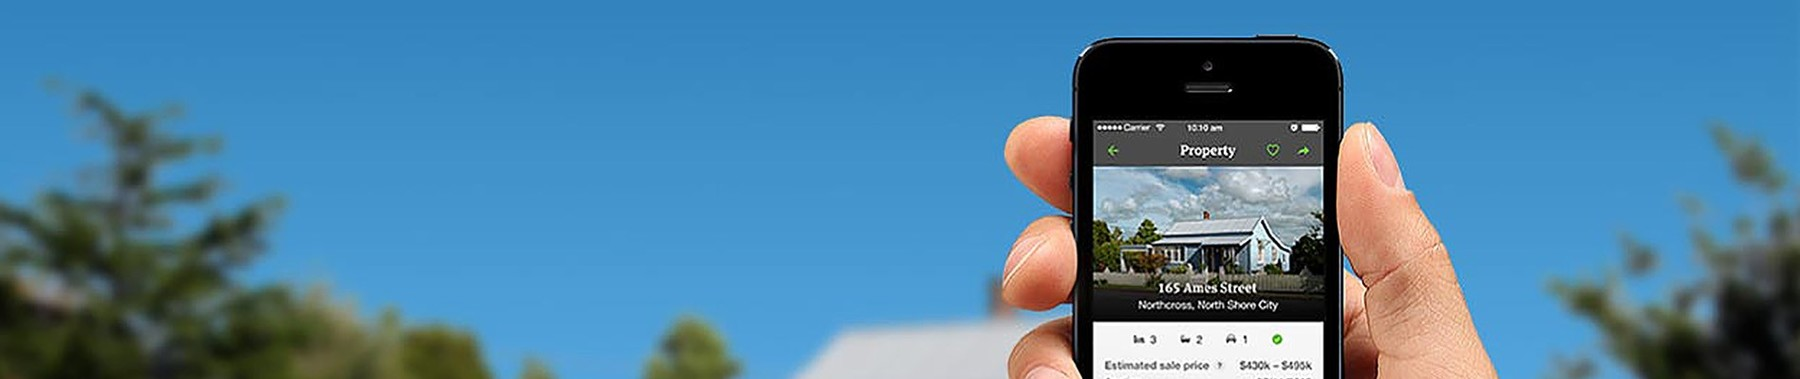

# <span style="font-size: 45px; background-color: #89cff0; padding: px;">Project on - CellPhone Price Range Predction <span>

- Name - Abhishek Kumar
- Email - ak352319@gmail.com

### Problem Statement

- Task 1:-Prepare a complete data analysis report on the given data.

- Task 2:-On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc predict the Price range of the mobile.

- Task 3:- Prepare the analysis report stating how model will help expanding the business by stating several factors including feature importance.



### CellphonePrice

#### All features of data set

- battery_power - Total energy a battery can store in one time           measured in mAh
- blue - Has bluetooth or not
- clock_speed - speed at which microprocessor executes instructions
- dual_sim - Has dual sim support or not
- fc - Front Camera mega pixels
- four_g - Has 4G or not
- int_memory - Internal Memory in Gigabytes
- m_dep - Mobile Depth in cm
- mobile_wt - Weight of mobile phone
- n_cores - Number of cores of processor
- pc - Primary Camera mega pixels
- px_height - Pixel Resolution Height
- px_width - Pixel Resolution Width
- ram - Random Access Memory in Megabytes
- sc_h - Screen Height of mobile in cm
- sc_w - Screen Width of mobile in cm
- talk_time - longest time that a single battery charge will last         when you are
- three_g - Has 3G or not
- touch_screen - Has touch screen or not
- wifi - Has wifi or not
- price_range - This is the target variable with value of 0(low           cost), 1(medium cost), 2(high cost) and 3(very high cost).

## Business Problem

 - We have to predict price range of the phone on the basis of given features.
 ----------------------------------------------------------------------------------------------------------------

### Import necssary libraries

In [1]:
# importing library
import numpy as np               # NumPy for numerical operations
import pandas as pd              # Pandas for data manipulation
import matplotlib.pyplot as plt  # Matplotlib for data visualization
import seaborn as sns            # Seaborn for enhanced data visualization
%matplotlib inline 


# For stop warning during code runing
import warnings
warnings.filterwarnings('ignore')

## Let's Import Cell Phone price range dataset

In [2]:
df=pd.read_csv("datasets_11167_15520_train.csv") # Dataset imported
pd.set_option('display.max_columns', None) # it will display all column in dataset
pd.set_option('display.max_rows', None) # it will display all rows in dataset

# Basics Check

In [3]:
df.shape # Checking shape of dataset

(2000, 21)

- Dataset has 2000 rows and 21 columns

In [4]:
# By defalut it Display the top 5 rows of the Dataset but I use to show top 3 rows only
df.head(3) 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2


In [5]:
# BY default it Display the last 5 rows of the Dataset but I use to show last 3 rows
df.tail(3) 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [6]:
# Generate summary statistics of dataset
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


- No constant column are present in the dataset
- Here some data shows min value 0 that is px_height and sc_w which is can't poosible. So from this we can infrence that some corrupted values are prsent in that feature column.
------------------------------------------------------------

In [7]:
df.info() # Understand dataset structure and Properties

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

- 1. Here all the features are numeric type  float and int.
- 2. Total float64 type column- 2
- 3. Total int64 type column - 19
- 4. Here data has no null value

## Now it's Time of Domain Analysis

 - In domain analysis we will write all information about every input features in dataset that how he is effecting on output fature cellphone price range.
 


In [8]:
df.columns # Show all columns of dataset

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### battery_power

----------------------

Total energy a battery can store in one time measured in mAh. The battery power of a cell phone is measured      in              milliampere-hours (mAh). A higher mAh battery will be able to store more energy and provide longer use between charges.          But the phone which has more battery capacity also price will be high.
 

### Blue - Bluetooth
----------

blue - Has bluetooth or not. Bluetooth is a wireless technology that allows devices to communicate with each other over short    distances. It is commonly used to connect cell phones to headsets, speakers, and other devices.
 

### Clock_speed
---------------------

clock_speed - speed at which microprocessor executes instructions.Clock speed is the speed at which a microprocessor executes    instructions. It is measured in hertz (Hz), which is the number of cycles per second. A cycle is a single electrical pulse      that the microprocessor uses to perform an operation.
   a microprocessor with a clock speed of 1 GHz can execute 1 billion cycles per second. This means that it can theoretically      execute 1 billion instructions per second. However, the actual number of instructions that can be executed per second will      depend on the complexity of the instructions and the other factors, such as the cache size and the memory bandwidth.
   In general, a higher clock speed will result in faster performance. However, there are other factors that can also affect        performance, such as the processor architecture and the instruction set.

### dual_sim -Has dual sim support or not
------------------------------------------------

there are some cases where dual SIM phones can be more expensive than single SIM phones. This is usually true for high-end phones that have a lot of other features, such as a powerful processor or a high-resolution display. In these cases, the additional cost of dual SIM support is relatively small compared to the overall price of the phone.

the price of a dual SIM phone will depend on a number of factors, including the brand, model, features, and market. However, in general, dual SIM phones are not significantly more expensive than single SIM phones.

### fc - Front Camera mega pixels 
--------------------------------------

 - front camera is a most important factor of cell phone ....... due to this specification price of phone can be high
 
 although it's just one of many factors that contribute to the pricing. Here are some ways in which the front camera can affect the price of a phone:

### four_g - Has 4G or not
-------------------------------

 - Four_g is a feature of mobile phone which is its provide fast network exploring in phone so due to this phone price should be high.
 
-  As technology evolves, older 4G devices may become more affordable as newer generations of connectivity (like 5G) become the norm. This can lead to price reductions in the 4G smartphone market, making these devices more accessible to a broader range of consumers.

### int_memory - Internal Memory in Gigabytes
-------------------------------------------------------

 - it is a space of phone where we can store photos , vdo, file etc.
   also it is a good specification of phone. the range of internal 
   in latest is minimum 64 gb to 1 tb. if the internal memory is less    like- 64gb, 32gb, can be less price phone also it's depend on        brand some phone has less internal memory but price is high          example- Iphone, google pixel etc... and some phone price can be      high if internal memory is higher example- 

### m_dep - Mobile Depth in cm
--------------------------------------

 - Mobile depth is a thickness of phone due to depth phone price can be hogh and low. if mobile is more thick price can be less and less thick phone can be high price 
 Reducing the depth of a phone can sometimes require rearranging internal components and making custom-sized components. This customization can increase production costs, as it might involve research, development, and testing of new layouts and components to fit within the slim form factor.

### mobile_wt - Weight of mobile phone
--------------------------------------------

- The weight of a mobile phone can impact its price, but it's just one of several factors that contribute to the overall pricing. Here are ways in which the weight of a phone can influence its price.
The weight of a phone is often closely related to the materials used in its construction. Lighter phones might use advanced materials like lightweight alloys, carbon fiber, or high-quality plastics that can be more expensive than traditional materials. These premium materials can contribute to a higher manufacturing cost and, in turn, a higher retail price.

### n_cores - Number of cores of processor
-------------------------------------------------

- The number of cores in a processor can indeed influence the price of a mobile phone, but it's just one of many factors that contribute to the overall pricing. Here's how the number of processor cores can impact the price of a phone

 - Processors with more cores can generally handle multitasking and complex tasks more efficiently. Phones with processors that have a higher number of cores tend to offer better performance, faster app loading times, and smoother multitasking experiences. Phones with higher core counts might be priced higher due to their superior performance capabilities.
 
 - Processors with more cores often have more complex designs and require more advanced manufacturing processes. The production of processors with a higher core count can be more expensive, which can lead to a higher cost for the phone and, subsequently, a higher retail price.

### pc - Primary Camera mega pixels
-----------------------------------------

 - Mega pixel is just a number.

- The number of megapixels in a phone's primary camera can impact the device's price, although it's just one of many factors that contribute to the overall pricing. Here's how the megapixel count of the primary camera can influence the price of a phone.
 
 - Higher megapixel counts often correlate with higher image resolutions. Phones with cameras capable of capturing high-resolution photos can offer better image quality, more detail, and potentially improved low-light performance. Phones with higher megapixel primary cameras might be priced higher due to the enhanced image quality they can provide.
 
 - Along with the megapixel count, the quality of the camera sensor, lens, and image processing technology also affects the final image quality. Phones with higher megapixel counts might incorporate advanced camera technologies, such as larger sensors, better lenses, and improved image processing algorithms, which can contribute to higher manufacturing costs and a higher retail price.

### px_height - Pixel Resolution Height
--------------------------------------------

 - The pixel resolution height of a phone's display can indeed impact the device's price, but it's just one of several factors that contribute to the overall pricing. Here's how the pixel resolution height of a display can influence the price of a phone. If higher resolution displays are considered a trend or are in demand in the market, manufacturers might price their devices higher to capitalize on this demand.
 
 - Display Quality: Higher pixel resolution height often results in a sharper and more detailed display. Phones with higher resolution displays can offer better visual clarity, which can enhance the user experience when viewing images, videos, and text. Phones with higher pixel resolution displays might be priced higher due to the improved display quality they provide.
 
 - Energy Consumption: Displays with higher resolution might consume more power. To mitigate this, manufacturers might need to invest in energy-efficient technologies, which can impact manufacturing costs and pricing

### px_width - Pixel Resolution Width
------------------------------------------

-  Higher pixel resolution width often leads to a wider and more detailed display. Phones with higher width resolutions can provide a better visual experience, particularly for tasks like multitasking, viewing wide content, and browsing websites. Phones with higher width resolution displays might be priced higher due to the improved display quality they offer.

- The pixel resolution width of a phone's display can impact the device's price, although it's just one of several factors that contribute to the overall pricing. Here's how the pixel resolution width of a display can influence the price of a phone.

- The aspect ratio of the display can affect how the device is used and how content is displayed. Phones with unique or wider aspect ratios might be priced differently based on their niche appeal and associated features.

### ram - Random Access Memory in Megabytes
---------------------------------------------------------

 - RAM (Random Access Memory) in a phone is a type of volatile memory that plays a crucial role in the device's overall performance. It serves as a temporary workspace for the phone's operating system (OS), apps, and data that are currently in use. RAM is different from the phone's internal storage (like the storage used for apps, files, and the OS) in several key ways
 
 - RAM is much faster to access than internal storage. This speed is essential for quickly loading apps, switching between tasks, and providing a smooth user experience.
 
 - some apps continue running in the background to provide notifications or other services. These background processes use RAM, and having enough RAM ensures that they don't slow down the device.

### sc_h - Screen Height of mobile in cm
----------------------------------------------

- The screen height of a mobile phone can indeed influence its price, although it's just one of several factors that contribute to the overall pricing. Here's how the screen height of a phone can impact its price

 - A taller screen can provide a more immersive visual experience for content consumption, gaming, and productivity. Phones with taller screens might be priced higher due to the enhanced display quality they offer.
 
 - Designing and manufacturing screens with specific dimensions can impact costs. Taller screens might require adjustments to the device's aspect ratio, resolution, and other design elements, potentially increasing manufacturing costs and leading to a higher retail price.
 
 - Taller screens can enable unique user experiences, such as split-screen apps, enhanced browsing, and improved app interaction. These experiences can influence the perceived value and pricing of the phone.

### sc_w - Screen Width of mobile in cm
---------------------------------------------

- the screen width of a mobile phone can influence its price due to factors such as display quality, manufacturing costs, branding, market trends, multimedia and productivity benefits, segment targeting, technological innovation, user experience, and design considerations. It's important to consider the overall display quality, other display-related features, and the preferences of the target audience when evaluating the pricing of a phone based on its screen width.

-  A wider screen can provide a more immersive visual experience for content consumption, gaming, and multitasking. Phones with wider screens might be priced higher due to the enhanced display quality they offer.
 
 - Designing and manufacturing screens with specific dimensions can impact costs. Wider screens might require adjustments to the device's aspect ratio, resolution, and other design elements, potentially increasing manufacturing costs and leading to a higher retail price.
 
 - If phones with wider screens are in demand or considered a trend, manufacturers might price their devices higher to cater to this demand. Wider screens often involve innovations in design and engineering. If a phone incorporates cutting-edge screen technologies to achieve a wider aspect ratio, it can justify a higher price based on these advancements.
 
 - Wider screens can contribute to a phone's design aesthetic. Phones with well-executed designs that emphasize the wider screen aspect might be priced higher due to the design effort involved.

### talk_time - longest time that a single battery charge will last when you are
------------------------------------------------------------------

- The talk time of a battery, which refers to the amount of time a phone can be used for voice calls on a single charge, can influence the price of a mobile phone, although it's just one of several factors that contribute to the overall pricing. Here's how the talk time of a battery can impact the price of a phone.

 - Phones with longer talk times usually have larger battery capacities to support extended usage. Larger batteries can be more expensive to manufacture and can contribute to a higher retail price.
 
 - Phones with longer talk times might incorporate advanced battery technologies, such as more efficient energy storage methods or optimized power management systems. These technologies can increase manufacturing costs and, in turn, the price of the phone. Phones with longer talk times often feature energy-efficient components and optimizations to maximize battery life. These components and optimizations can impact manufacturing costs and pricing.
 
 - Phones with longer talk times might also incorporate fast charging technologies to minimize downtime when recharging. These technologies can contribute to manufacturing costs and pricing.

### three_g - Has 3G or not
-------------------------------

 - Phones with 3G capability offer cellular connectivity for voice calls and data, although at lower speeds compared to more advanced generations like 4G and 5G. The inclusion of 3G connectivity can add to the manufacturing costs, contributing to a higher retail price.
 
 -  Although 3G technology is older, incorporating the necessary hardware and components to support 3G connectivity might involve certain costs. Phones with 3G capability might require additional engineering and testing to ensure compatibility with networks, which can contribute to higher production costs.
 
 - In markets where 3G-capable phones are in demand, manufacturers might adjust their pricing based on competition. The pricing can be influenced by the features and specifications offered by competing devices in the same segment.
 
  - Manufacturers might position phones with 3G connectivity as affordable devices with basic connectivity options. These phones can be marketed as budget-friendly options and might be priced accordingly.

### touch_screen - Has touch screen or not
--------------------------------------------------

 - The presence or absence of a touch screen in a mobile phone can significantly impact its price, as it is one of the fundamental components that define the modern smartphone experience. Here's how the inclusion or exclusion of a touch screen can influence the price of a phone:
 - Touch screens are an integral part of modern smartphones, providing a user-friendly and intuitive interface for navigation, interaction, and control. Phones with touch screens offer a more sophisticated and interactive user experience, and therefore tend to be priced higher. ouch screen phones are often positioned as modern and capable devices. Manufacturers might market touch screen phones as offering enhanced usability and advanced features, which can lead to a higher price based on the associated value.
 
 - Non-touch devices might cater to users who prefer a simpler interface or require a device that can withstand harsh environments. These devices might focus on durability and practicality, which can be valued by specific user segments.
 
 - Non-touch devices don't require the integration of touch-sensitive components and technologies. As a result, they might have lower manufacturing costs, potentially leading to a more affordable retail price.
 
 - Non-touch devices might lack certain features that rely on touch interactions, such as complex app interfaces and certain gaming experiences. This limited feature set can impact the perceived value and pricing of the device.  the presence or absence of a touch screen in a mobile phone can significantly influence its price due to factors such as user experience, manufacturing costs, market expectations, features, brand positioning, simplicity, durability, limited features, and niche targeting. Touch screens are a defining feature of modern smartphones, and their inclusion is generally associated with higher prices due to the enhanced functionality and user experience they offer.

### wifi - Has wifi or not
-----------------------------

 -  inclusion of Wi-Fi capability in a mobile phone is a standard feature in modern smartphones and does not typically have a significant impact on the price. Wi-Fi functionality has become an essential and expected feature in smartphones due to its widespread use and benefits. Here's how the presence of Wi-Fi can influence the price of a phone. Wi-Fi connectivity is considered a standard feature in smartphones. As a result, its inclusion doesn't typically lead to significant price variations among different smartphone models.
 
 - Consumers expect Wi-Fi connectivity in their smartphones for accessing the internet, downloading apps, streaming media, and other online activities. Manufacturers include Wi-Fi as a basic connectivity option to meet these expectations.
 
 - In today's competitive smartphone market, Wi-Fi connectivity is a baseline feature. Phones without Wi-Fi would not be competitive or appealing to consumers, which could result in poor sales and market reception.
 
 - Wi-Fi offers a faster and more stable connection for data-intensive tasks, which enhances the user experience. Phones with Wi-Fi are perceived as more versatile and valuable due to the convenience of connecting to Wi-Fi networks.  the inclusion of Wi-Fi functionality in a mobile phone is not a major factor influencing its price. Wi-Fi has become a standard and expected feature in smartphones due to its widespread use and benefits. Manufacturers consider it a necessary component to provide users with a satisfactory internet experience and competitive device offerings.

### price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------

# EDA (Exploratory data Analysis)


 - it is most important part of machine learning project 
 - In EDA we will do analysis about all the features in given dataset.
 - there is some step in EDA
    - Univariate analysis
    - Bivariate analysis
    - Multivariate analysis

## Univariate Analysis

  - Univariate Analysis is a type of data visualization where we visualize only a single variable at a time
  - I will plot all feature by using some graph.
  - Here some data are categorical and some are numerical according to the feature I will use some graph.
  - Here we will do analysis one-by-one of all features that is given in dataset. 


In [9]:
df.columns # it's easy to see the all columns name in dataset

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## battery_power
 - This is numerical feature in dataset. 

Text(0.5, 1.0, 'battery_power Distribution')

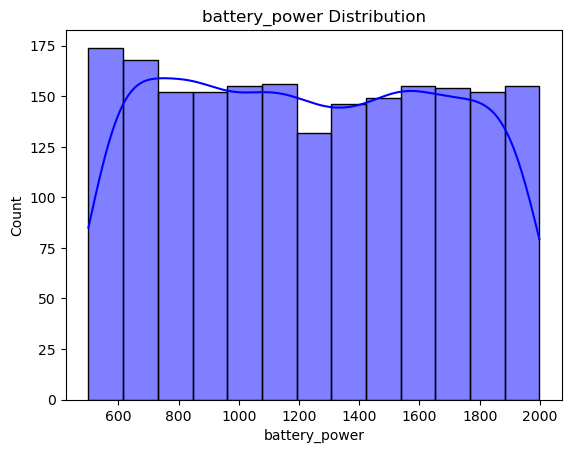

In [10]:
sns.histplot(df['battery_power'],kde =True,color='blue')
plt.title('battery_power Distribution')

- Here all data is well distributed but little bit 600 to 700 mah battery has more count.
-----------------------------------------------------------------

## blue - Bluetooth
 - this is categorical features in data set 

Text(0.5, 1.0, 'Has bluetooth or not')

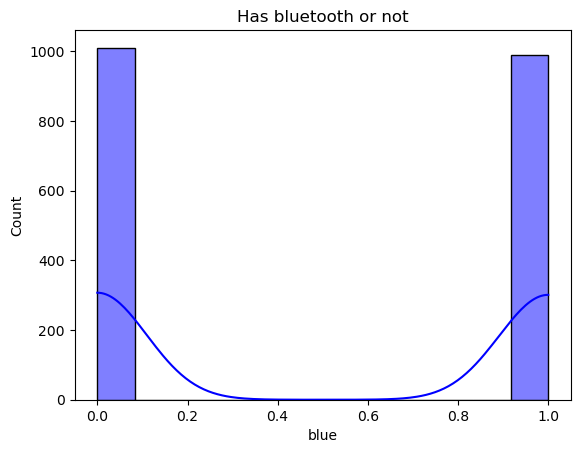

In [11]:
sns.histplot(df['blue'],kde =True,color='blue')
plt.xlabel('blue')
plt.title('Has bluetooth or not')

In [12]:
df[df['blue']==0].value_counts().sum()

1010

In [13]:
df[df['blue']==1].value_counts().sum()

990

- There are cellphone which has not bluetooth count is 1010 and cellphone has bluetooth their count is 990. so Bluetooth phone is less.
------------------------------------------------

## clock_speed

Text(0.5, 1.0, 'clock_speed Distribution')

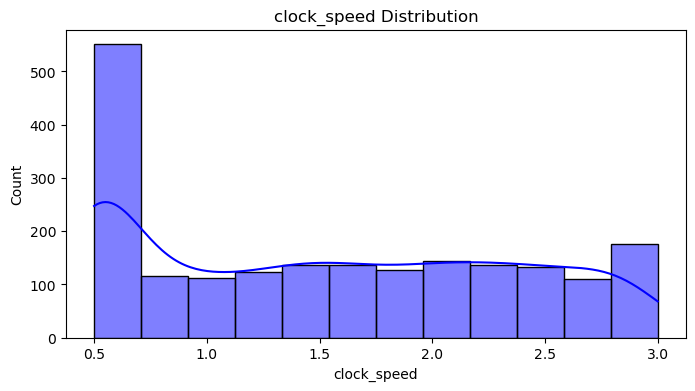

In [14]:
plt.figure(figsize=(8,4), facecolor='white')
sns.histplot(df['clock_speed'],kde =True,color='blue')
plt.title('clock_speed Distribution')

- Here clock_speed distribution has very high at point 0.5
-----------------------------------------------------------------

## dual_sim

Text(0.5, 1.0, 'Has dual sim support or not in cellphone')

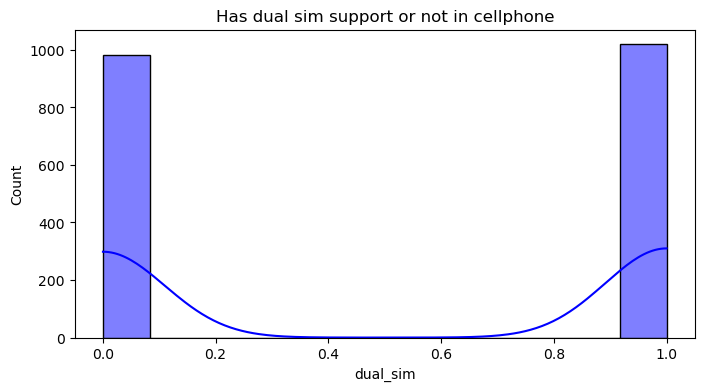

In [15]:
plt.figure(figsize=(8,4), facecolor='white')
sns.histplot(df['dual_sim'],kde =True,color='blue')
plt.title('Has dual sim support or not in cellphone')

In [16]:
df["dual_sim"].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

- Here in the plot we can inference that the number of having dual sim is  1019 
- the number of having not dual sim is  981
---------------------------------------------------------------------

### fc - Front camera

Text(0.5, 1.0, 'Front camera in cellphone')

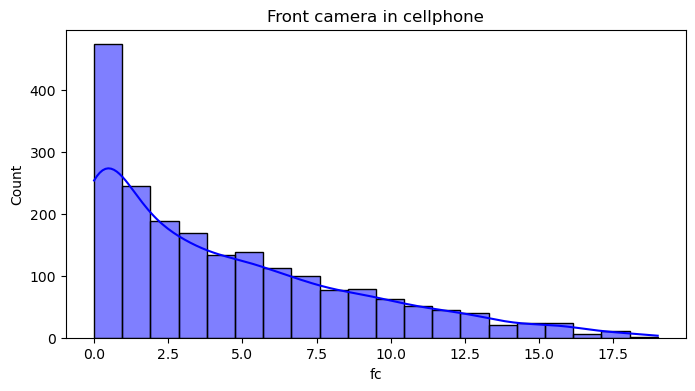

In [17]:
plt.figure(figsize=(8,4), facecolor='white')
sns.histplot(df['fc'],kde =True,color='blue')
plt.title('Front camera in cellphone')

 - this feature is looking right skew so the distribution of front camera in cellphone has higher count at starting.
 ---------------------------------------------------------------

### four_g

Text(0.5, 1.0, 'Has 4g or not in cellphone')

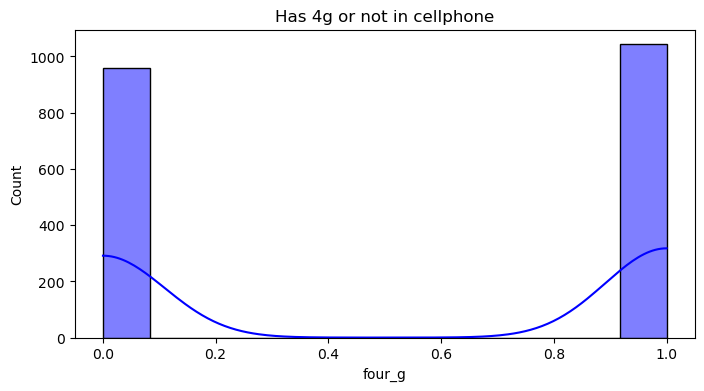

In [18]:
plt.figure(figsize=(8,4), facecolor='white')
sns.histplot(df['four_g'],kde =True,color='blue')
plt.title('Has 4g or not in cellphone')

In [19]:
df["four_g"].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

- Here I did not get more information because not-4g and yes-4g is same at both point.
-----------------------------------------------------------------------

### int_memory

Text(0.5, 1.0, 'How much is the internal memory? ')

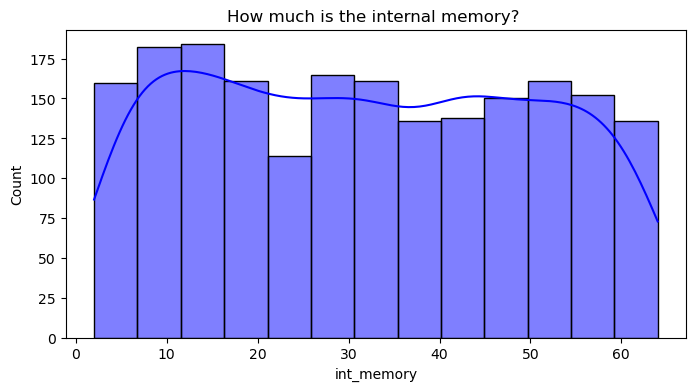

In [20]:
plt.figure(figsize=(8,4),facecolor='white')
sns.histplot(df['int_memory'],kde=True,color='blue')
plt.title('How much is the internal memory? ')

- the count of Internal memory is little bit more from 8 to 15 point.
----------------------------------------------------------------------

### m_dep - mobile depth in cellphone

Text(0.5, 1.0, 'Mobile depth in cellphone')

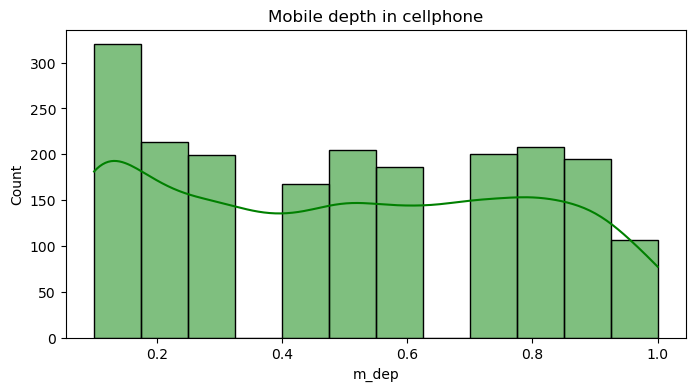

In [21]:
plt.figure(figsize=(8,4))
sns.histplot(df['m_dep'],kde = True, color = 'green')
plt.title('Mobile depth in cellphone')

- cellphone has more depth at point 0.2
---------------------------------------------

### mobile_wt - Weight of mobile phone

Text(0.5, 1.0, 'Mobile weight of cellphone')

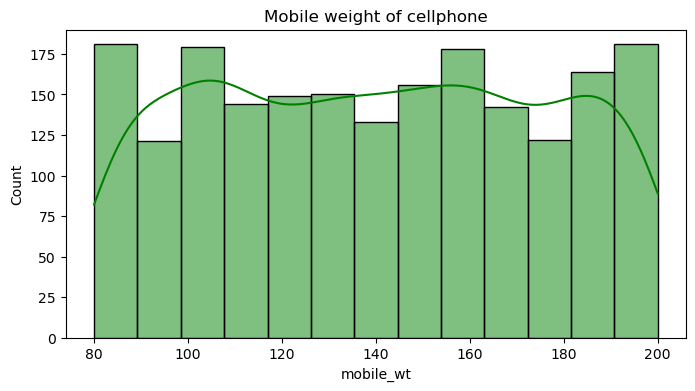

In [22]:
plt.figure(figsize=(8,4))
sns.histplot(df['mobile_wt'],kde = True, color = 'green')
plt.title('Mobile weight of cellphone')

- Here data distribution is almost equal at all points.
-----------------------------------------------------------

### n_cores - Number of cores of processor

Text(0.5, 1.0, 'Number of cores of processor')

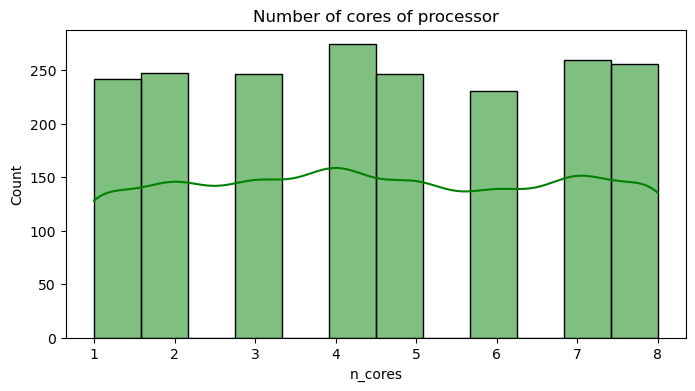

In [23]:
plt.figure(figsize=(8,4))
sns.histplot(df['n_cores'],kde = True, color = 'green')
plt.title('Number of cores of processor')

- Number of cores of processor has variation at point 4 to 5.
------------------------------------------------------------------

### pc - primary camera mega pixel

Text(0.5, 1.0, 'primary camera in cellphone')

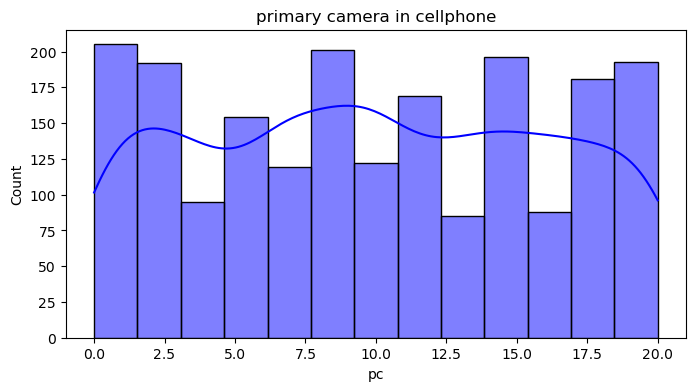

In [24]:
plt.figure(figsize=(8,4), facecolor = 'white')
sns.histplot(df['pc'], color='blue',kde = True)
plt.title('primary camera in cellphone')

- This feature has variation at b/w some point. but all over distribution is well.
----------------------------------------------------------------

### px_height

Text(0.5, 1.0, 'pixel resolution height in cellphone')

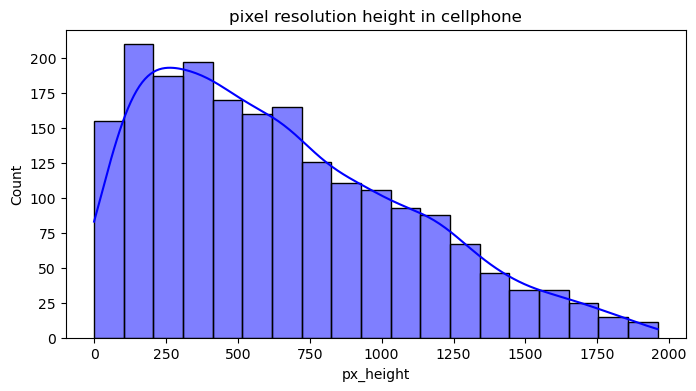

In [25]:
plt.figure(figsize=(8,4), facecolor = 'white')
sns.histplot(df['px_height'], color='blue',kde=True)
plt.title('pixel resolution height in cellphone')

- This feature is looking right skew.
-------------------------------------

### px_width - Pixel Resolution Width

Text(0.5, 1.0, 'Pixel Resolution Width')

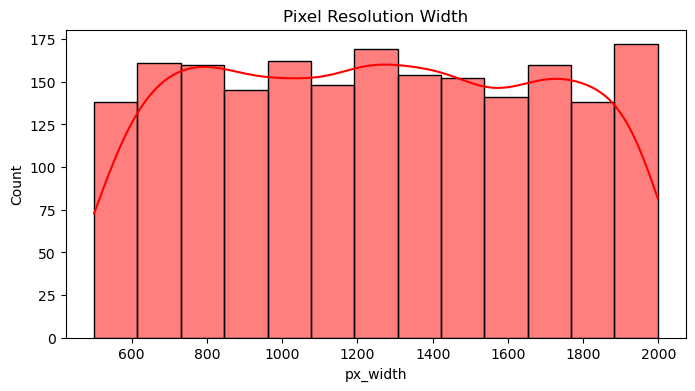

In [26]:
plt.figure(figsize=(8,4), facecolor = 'white')
sns.histplot(df['px_width'], color='red',kde=True)
plt.title('Pixel Resolution Width')

- Data distribution is well so I did not get more information.
--------------------------------------------------------------------

### ram - Random Access Memory in Megabytes

Text(0.5, 1.0, 'Ram distribution in cellphone')

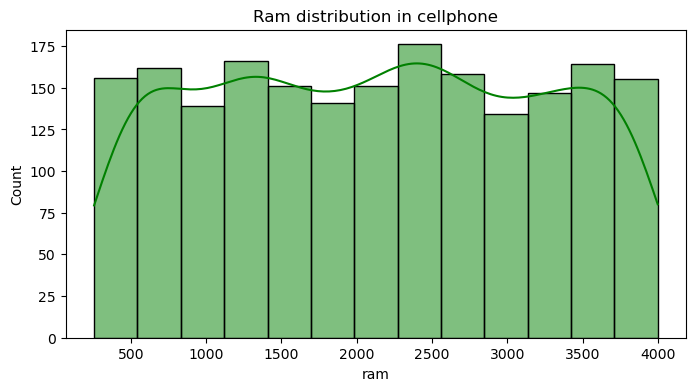

In [27]:
plt.figure(figsize=(8,4), facecolor = 'white')
sns.histplot(df['ram'], color='green',kde=True)
plt.title('Ram distribution in cellphone')

- data has no more variation. so i did not get more info.
-----------------------------------------------------------

### sc_h - Screen Height of mobile in cm

Text(0.5, 1.0, 'Screen Height of mobile in cm')

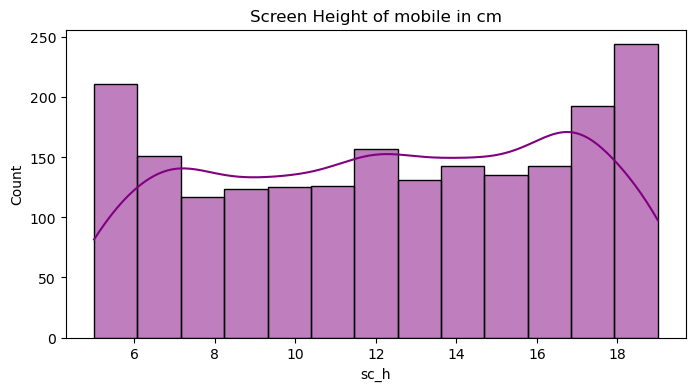

In [28]:
plt.figure(figsize=(8,4), facecolor = 'white')
sns.histplot(df['sc_h'], color='Purple',kde=True)
plt.title('Screen Height of mobile in cm')

- Here screen height of cellphone has more count at point 18 and 6
--------------------------------------------------------------------

### sc_w - Screen Width of mobile in cm

Text(0.5, 1.0, 'Screen width of mobile in cm')

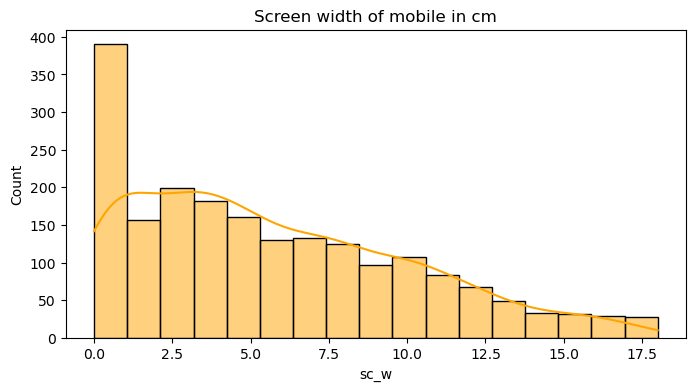

In [29]:
plt.figure(figsize=(8,4), facecolor = 'white')
sns.histplot(df['sc_w'], color='Orange',kde=True)
plt.title('Screen width of mobile in cm')

- distriburion of screen width in cellphone at point 0 has higher count and this data is looking roght skew
------------------------------------------------------------------

### talk_time - longest time that a single battery charge will last when you are

Text(0.5, 1.0, 'Talk time of cell phone on single battery charge')

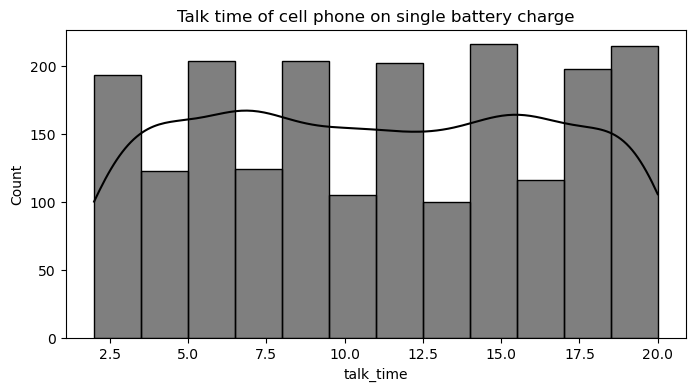

In [30]:
plt.figure(figsize=(8,4), facecolor = 'white')
sns.histplot(df['talk_time'], color='Black',kde=True)
plt.title('Talk time of cell phone on single battery charge')

- talk time of cellphone on single battery charge is more variation at between point.
-------------------------------------------------------------------

### three_g - Has 3G or not

Text(0.5, 1.0, 'Has 3g or not in cellphone')

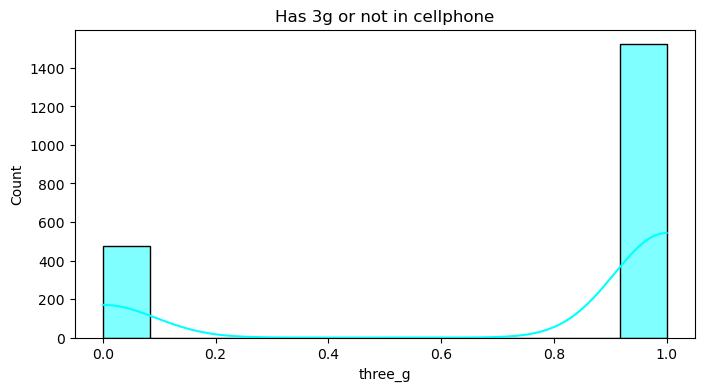

In [31]:
plt.figure(figsize=(8,4), facecolor = 'white')
sns.histplot(df['three_g'], color='Cyan',kde=True)
plt.title('Has 3g or not in cellphone')

In [32]:
df['three_g'].value_counts()

1    1523
0     477
Name: three_g, dtype: int64

- Avilable of three_g in cellphone which has high count 1523 and which cellphone has not three_g count is 477 that is very less.
---------------------------

### touch_screen - Has touch screen or not

Text(0.5, 1.0, 'Has touch or not in cellphone')

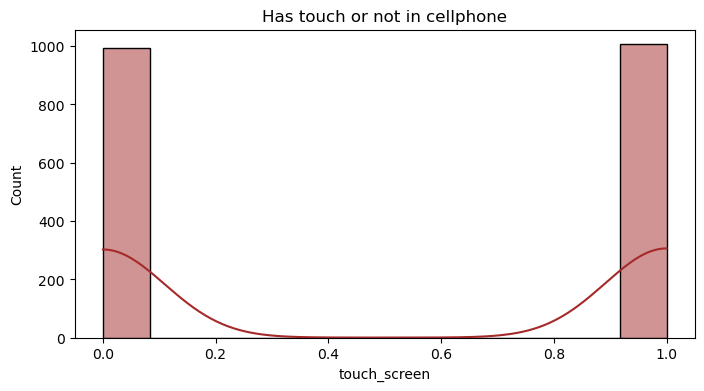

In [33]:
plt.figure(figsize=(8,4), facecolor = 'white')
sns.histplot(df['touch_screen'], color='Brown',kde=True)
plt.title('Has touch or not in cellphone')

In [34]:
df['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

- The count of four_g cellphone is 1043 which is more because cellphone has not four_g that count is 957.
----------------------------------------------------------------------

### wifi - Has wifi or not

Text(0.5, 1.0, 'Has wifi or not in cellphone')

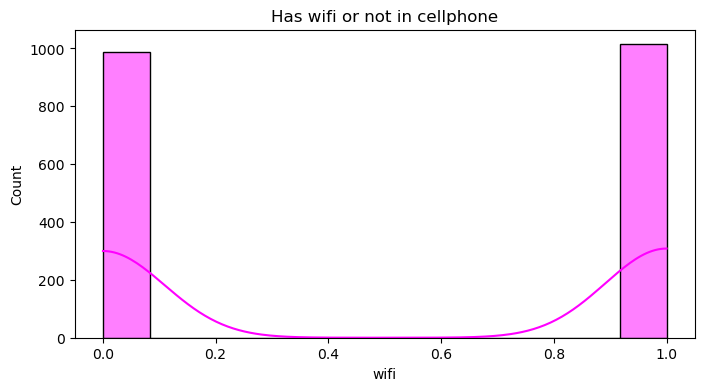

In [35]:
plt.figure(figsize=(8,4), facecolor = 'white')
sns.histplot(df['wifi'], color='Magenta',kde=True)
plt.title('Has wifi or not in cellphone')

In [36]:
df['wifi'].value_counts()

1    1014
0     986
Name: wifi, dtype: int64

- The count of cellphone is 1014 which has wifi, and which has not wifi that count is 986.
---------------------------------------------------------------------

### price_range

Text(0.5, 1.0, 'Price range of cellphone')

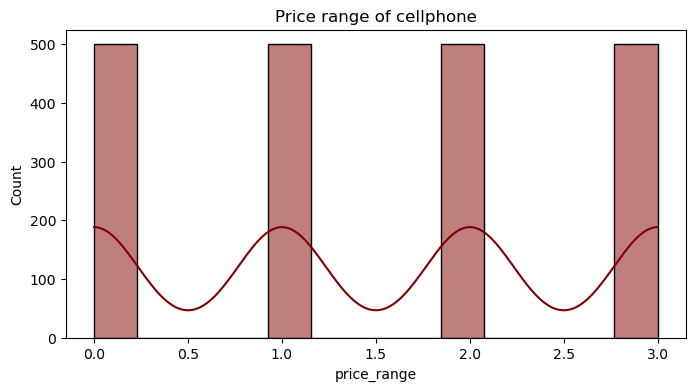

In [37]:
plt.figure(figsize=(8,4), facecolor = 'white')
sns.histplot(df['price_range'], color='Maroon',kde=True)
plt.title('Price range of cellphone')

In [38]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

- the price range of low cost, middle cost , high cost and very high cost cellphone count is accurate same.
- Price range of cellphone is balanced.
--------------------------------------------

# Now it's time of Bivariate analysis
   - Bivariate analysis is one of the statistical analysis where two        variables are observed. One variable here is dependent while the        other is independent. These variables are usually denoted by X and      Y. So, here we analyse the changes occured between the two              variables and to what extent.
   - Bivariate allows only two columns to be analyzed at once
   - i will analyze of all input column with output column
   - I will display Bivariate graph by using some plot for visulyse the relation between two features.
   - Also i will write insight about data distribution

In [39]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### Battery_power vs Price range
    

Text(0.5, 1.0, 'battery_power vs price_range')

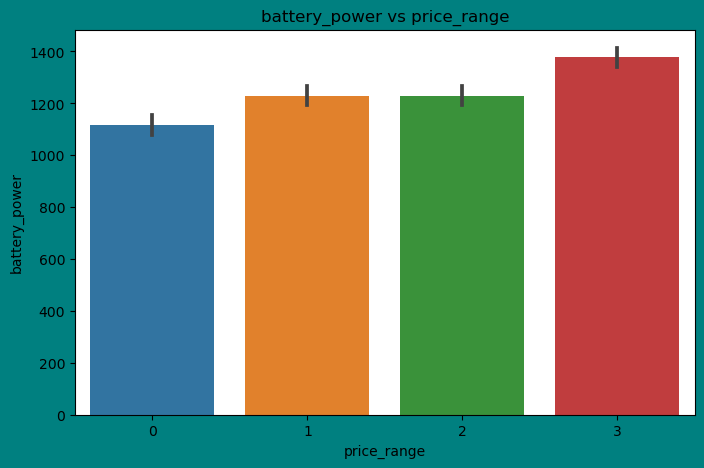

In [40]:
# Battery_power is a numerical future and price range is categorical so i use barplot... we can use lot of plot but i preffred barplot
plt.figure(figsize=(8,5),facecolor='teal')
sns.barplot(df,x ='price_range',y ="battery_power")
plt.title("battery_power vs price_range")

### battery_power vs price_range insight
- 3 (very high price range phone)- nearabout 1400 mah battery capacity
- 1 and 2 (medium and high range phone)- battery power capacity almost same
- 0(low price range phone) - it has 1100 mah battery power capacity which is less than other range phone
- Those phone whose battery power is high, its price is also high.
----------------------------------------------------------------------

### blue vs price range

Text(0.5, 1.0, 'bluetooth vs price_range')

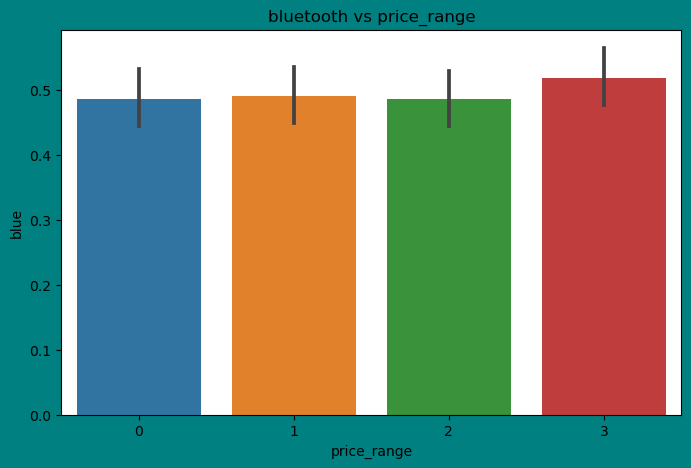

In [41]:
## this is combination of categorical vs categorical features so use countplot
plt.figure(figsize=(8,5),facecolor='teal')
sns.barplot(df,x ='price_range',y='blue')
plt.title("bluetooth vs price_range")


In [42]:
def check_df(df, price_range, blue):
    final_df = df[(df['price_range'] == price_range) & (df['blue'] == blue)].value_counts().sum()
    return final_df

# Example usage:
final_df = check_df(df, 0, 0)

In [43]:
final_df

257

In [44]:
final_df = check_df(df, 1, 0)
final_df

255

In [45]:
final_df = check_df(df, 2, 0)
final_df

257

In [46]:
final_df = check_df(df, 3, 0)
final_df

241

In [47]:
final_df = check_df(df, 3, 1)
final_df

259

In [48]:
final_df = check_df(df, 2, 1)
final_df

243

In [49]:
final_df = check_df(df, 1, 1)
final_df

245

In [50]:
final_df = check_df(df, 0, 1)
final_df

243

###### blue vs price range insight
 - More phone which has bluetooth that has high price range

### clock _speed vs price_range

Text(0.5, 1.0, 'clock_speed vs price_range')

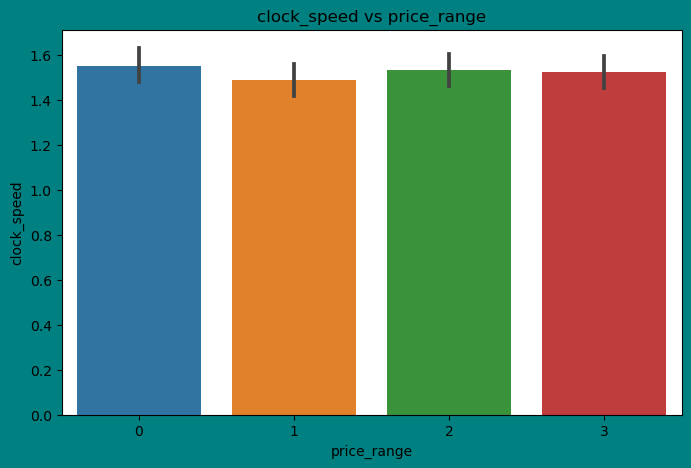

In [51]:
## this is combination of categorical vs categorical features so use barplot
plt.figure(figsize=(8,5),facecolor='teal')
sns.barplot(df,x ='price_range',y = "clock_speed")
plt.title("clock_speed vs price_range")

###### clock _speed vs price_range insight 
 - clock speed is same of all price range cellphone.

### dual sim vs price range

Text(0.5, 1.0, 'Dual sim vs price_range')

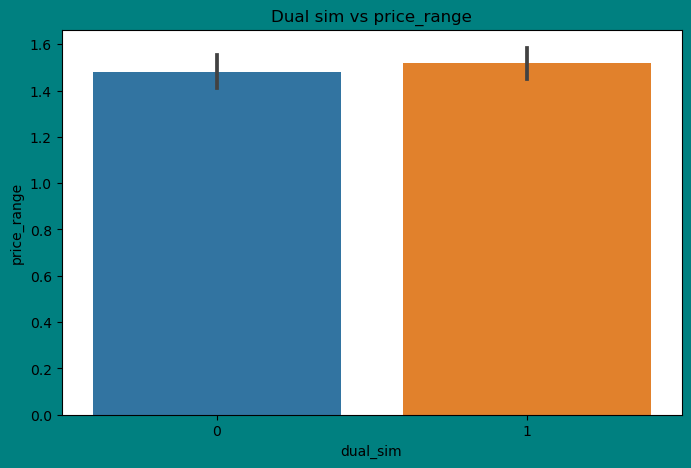

In [52]:
## this is combination of categorical vs categorical features so use barplot
plt.figure(figsize=(8,5),facecolor='teal')
sns.barplot(df,x ='dual_sim',y = "price_range",)
plt.title("Dual sim vs price_range")

###### Dual sim vs price_range
 - The price range is same in cellphone which has dual sim or not

### fc vs price range

Text(0.5, 1.0, 'front camera mega pixel vs price_range')

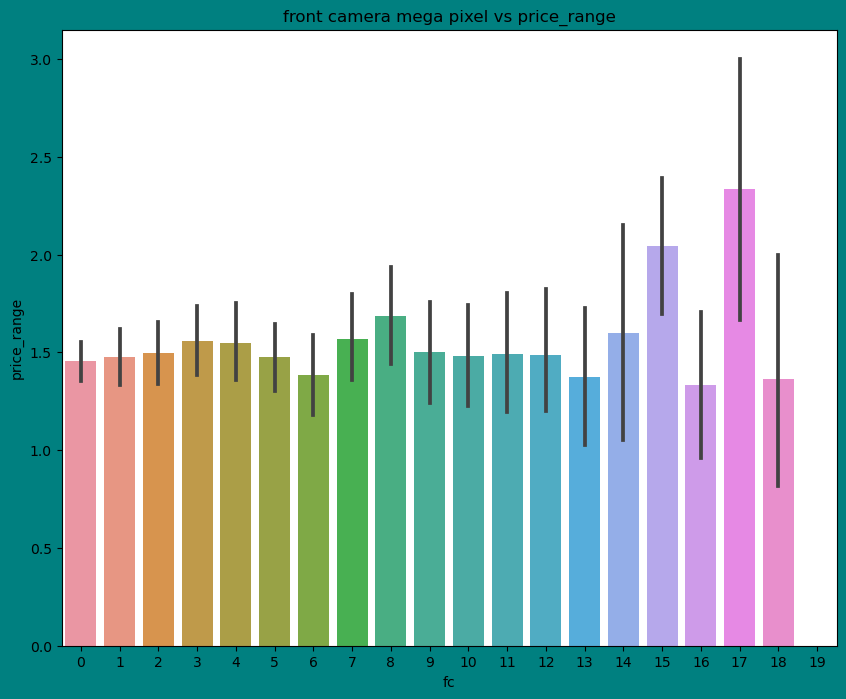

In [53]:
 ## this is combination of categorical vs categorical features so use barplot
plt.figure(figsize=(10,8),facecolor='teal')
sns.barplot(df,x ='fc',y = "price_range",)
plt.title("front camera mega pixel vs price_range")


### fc vs price_range insight

  - here 17 mega pixel very high price range
  - all other phone mega pixel price range is b/w medium and high

### four_g vs price range

Text(0.5, 1.0, 'four_g vs price_range')

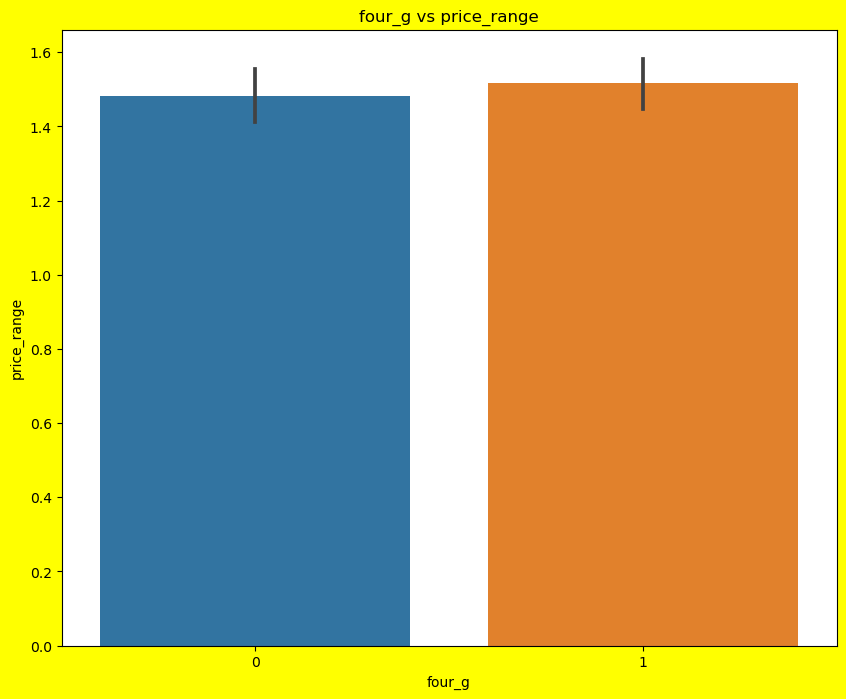

In [54]:
 ## this is combination of categorical vs categorical features so use barplot
plt.figure(figsize=(10,8),facecolor='yellow')
sns.barplot(df,x ='four_g',y = "price_range")
plt.title("four_g vs price_range")

###### four_g vs price range insight
 - cellphone price range is same  on both which has 4g or not.

### int_memory vs price_range

Text(0.5, 1.0, 'internal memory vs price_range')

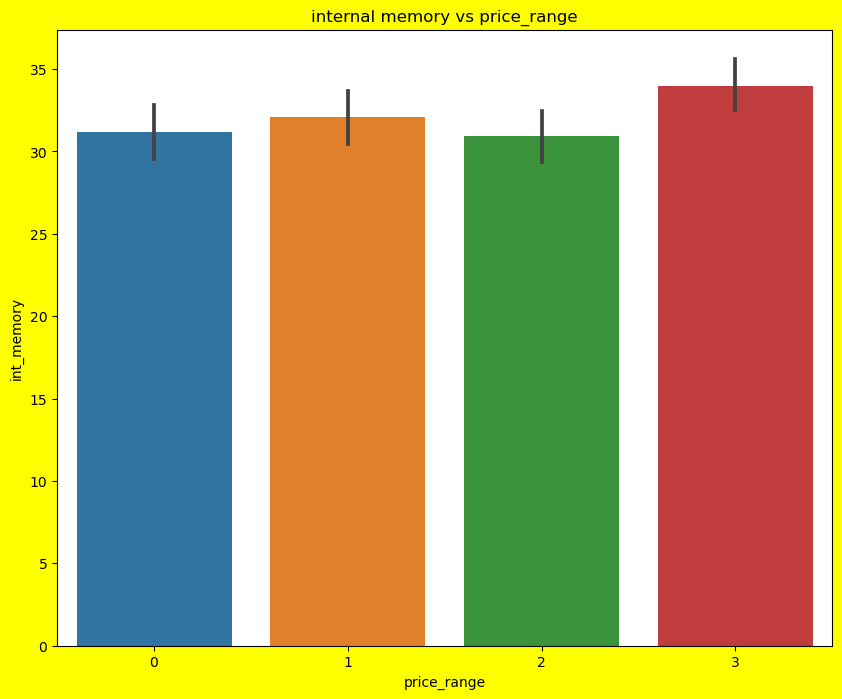

In [55]:
plt.figure(figsize=(10,8),facecolor='yellow')
sns.barplot(df,x ='price_range',y = "int_memory")
plt.title("internal memory vs price_range")

###### int_memory vs price_range insight
 - very hogher price range has more internal memory as compare to all proce range phone.

### m_dep vs price_range

Text(0.5, 1.0, 'Mobile depth vs price_range')

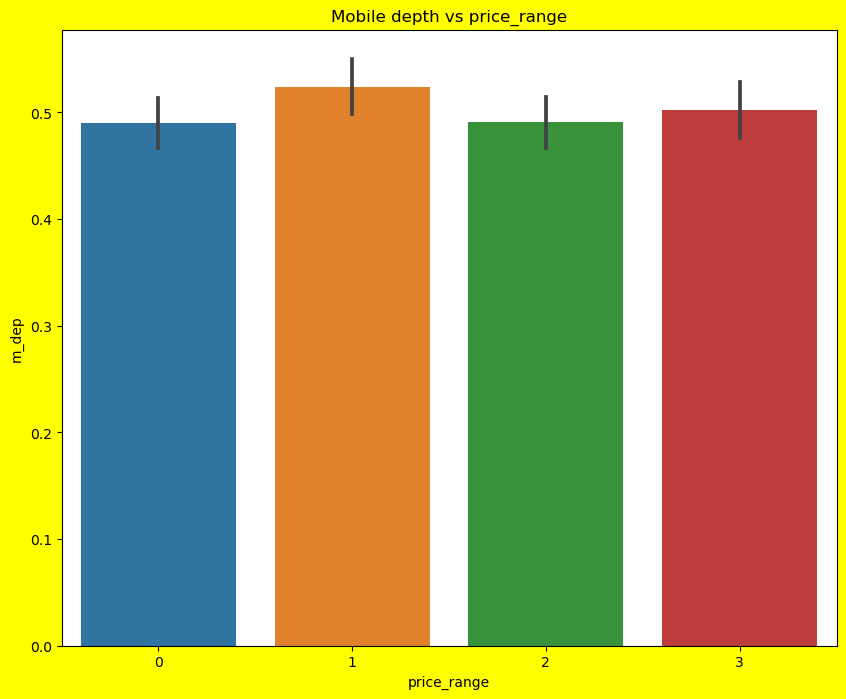

In [56]:
plt.figure(figsize=(10,8),facecolor='yellow')
sns.barplot(df,x ='price_range',y = "m_dep")
plt.title("Mobile depth vs price_range")

###### m_dep vs price_range insight
 - middle price range cellphone has more depth.

### mobile_wt vs price_range

Text(0.5, 1.0, 'mobile weight vs price_range')

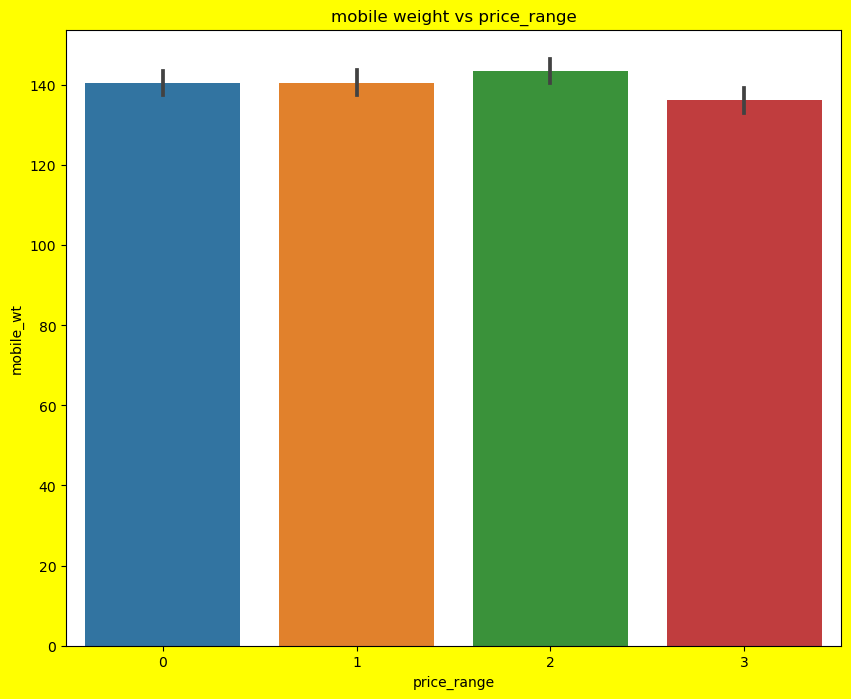

In [57]:
plt.figure(figsize=(10,8),facecolor='yellow')
sns.barplot(df,x ='price_range',y = "mobile_wt")
plt.title("mobile weight vs price_range")

###### mobile_wt vs price_range insight
 - Mobile weight is less in very higher price range phone 

### n_cores vs price_range

Text(0.5, 1.0, 'number of cores vs price_range')

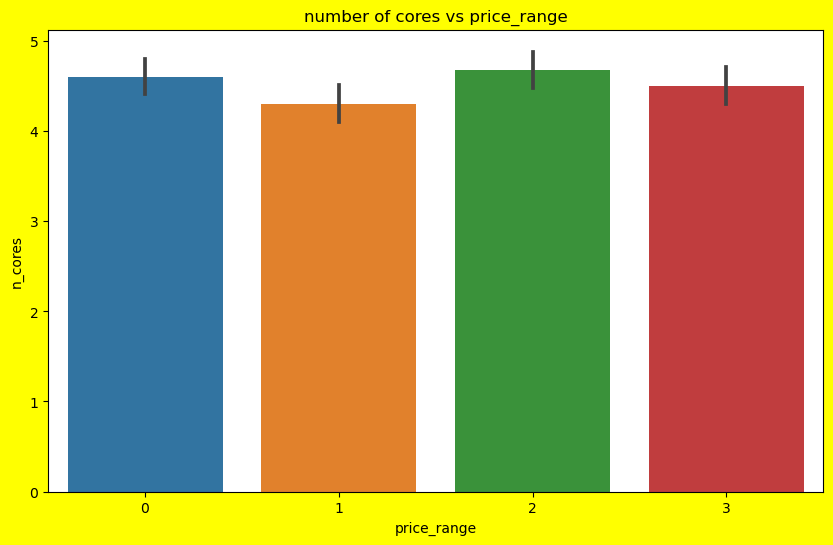

In [58]:
plt.figure(figsize=(10,6),facecolor='yellow')
sns.barplot(df, x = "price_range",y="n_cores")
plt.title("number of cores vs price_range")

###### n_cores vs price_range insight
 - numbers of core is less in middle and very higher price range phone.

### pc vs price_range

Text(0.5, 1.0, 'primary camera vs price_range')

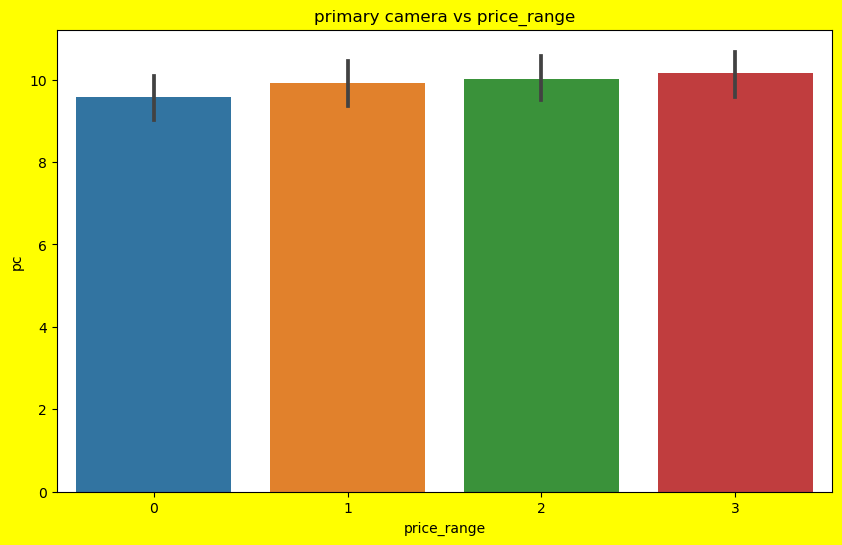

In [59]:
plt.figure(figsize=(10,6),facecolor='yellow')
sns.barplot(df, x = "price_range",y="pc")
plt.title("primary camera vs price_range")

###### pc vs price_range insight
 - low price range phone has less primary camera

### px_height vs price range

Text(0.5, 1.0, 'Pixel Resolution height vs price_range')

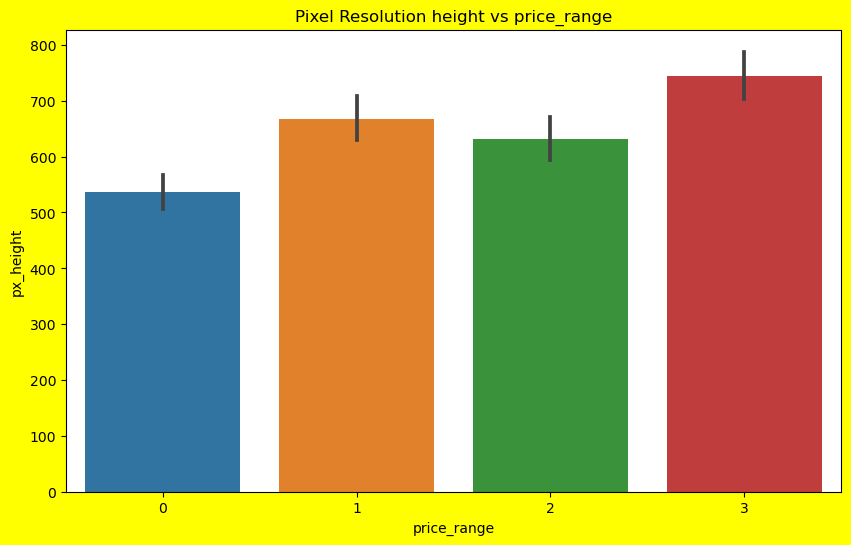

In [60]:
plt.figure(figsize=(10,6),facecolor='yellow')
sns.barplot(df, x = "price_range",y="px_height")
plt.title("Pixel Resolution height vs price_range")

###### px_height vs price range insight
 - Very high phone price range has more Pixel Resolution height and low phone price range has low Pixel Resolution height.

### px_width vs price_range

Text(0.5, 1.0, 'pixel resolution width vs price_range')

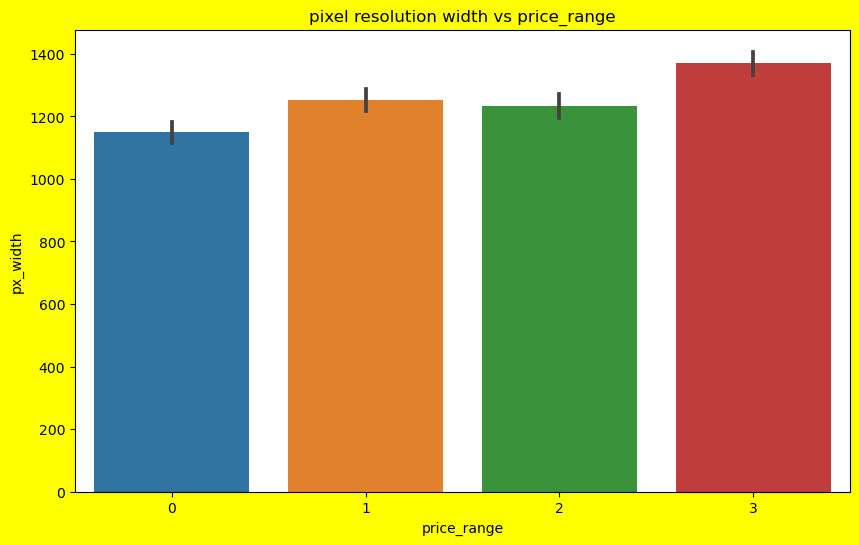

In [61]:
plt.figure(figsize=(10,6),facecolor='yellow')
sns.barplot(df, x = "price_range",y="px_width")
plt.title("pixel resolution width vs price_range")

###### px_width vs price_range insight
 - pixel resolution width is more in very high price range phone

### ram vs price_range

Text(0.5, 1.0, 'Ram vs price_range')

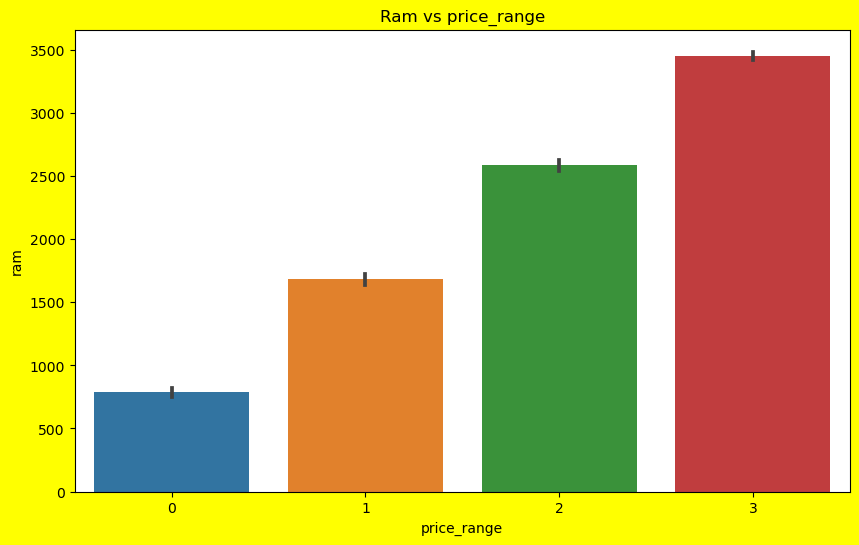

In [62]:
plt.figure(figsize=(10,6),facecolor='yellow') #,hue="price_range"
sns.barplot(df, x = "price_range",y="ram")
plt.title("Ram vs price_range")

###### ram vs price_range Insight
 - the phone has more ram which is very higher peice range

### sc_h vs price_range

Text(0.5, 1.0, 'Screen height of phone vs price_range')

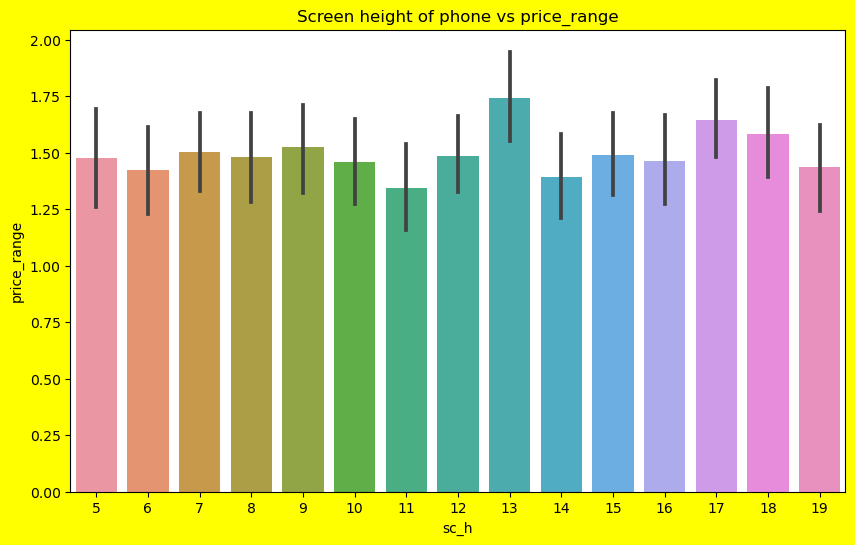

In [63]:
plt.figure(figsize=(10,6),facecolor='yellow')
sns.barplot(df, x = "sc_h",y="price_range")
plt.title("Screen height of phone vs price_range")

###### sc_h vs price_range Insight
 - The phone price range is more of 13 cm screen height.

### sc_w vs price_range

Text(0.5, 1.0, 'Screen width of phone vs price_range')

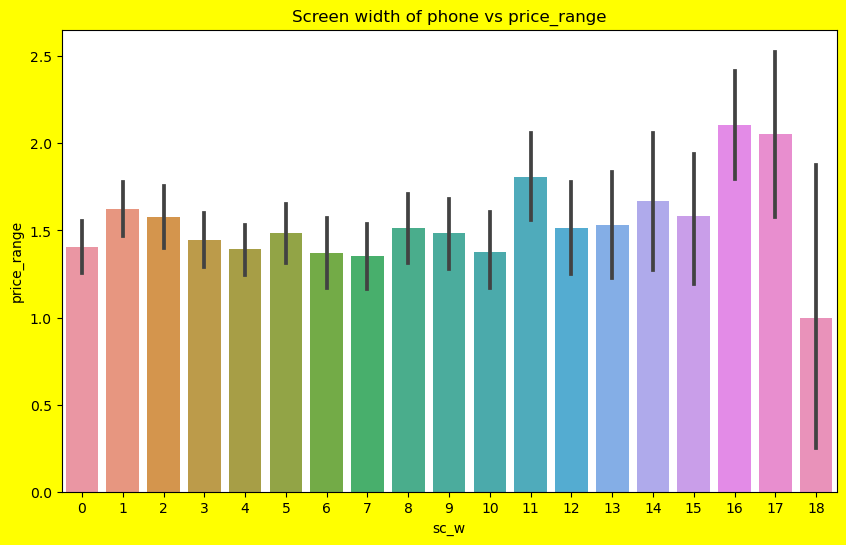

In [64]:
plt.figure(figsize=(10,6),facecolor='yellow')
sns.barplot(df, x = "sc_w",y="price_range")
plt.title("Screen width of phone vs price_range")

###### sc_w vs price_range Insight
 - 16 and 17 cm of screen width phone is more expensive.

### talk_time vs price_range

Text(0.5, 1.0, 'talk time vs price range')

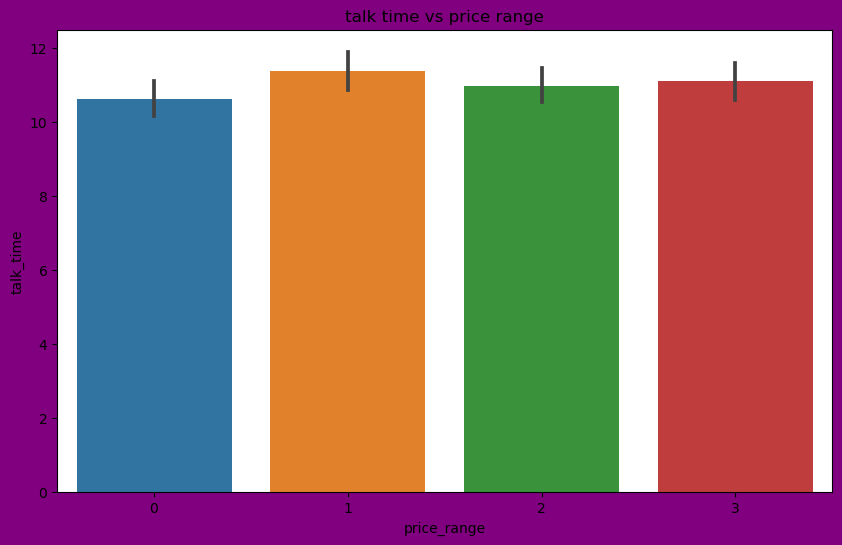

In [65]:
plt.figure(figsize=(10,6),facecolor="purple")
sns.barplot(df,x="price_range", y ="talk_time")
plt.title("talk time vs price range")

######  talk_time vs price_range insight
 - medium price range of the phone has more talk time of battery.

### three_g vs price range

Text(0.5, 1.0, '3g vs price range')

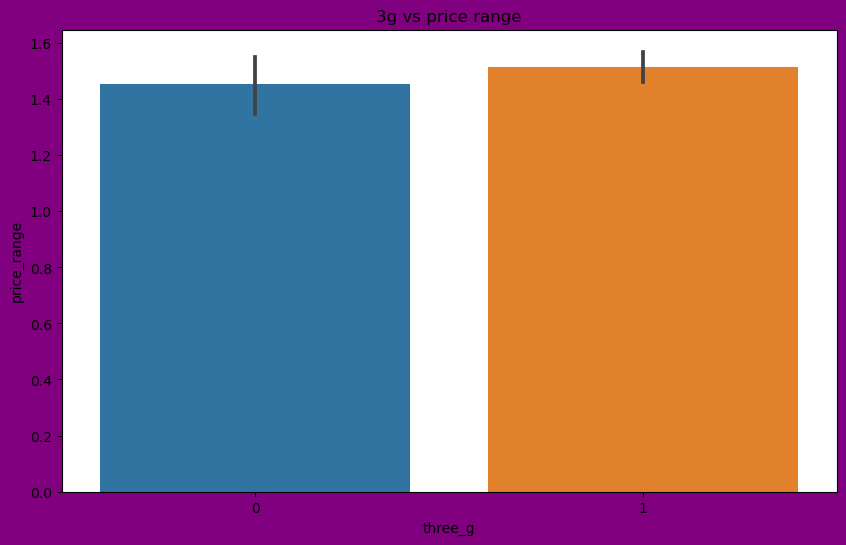

In [66]:
plt.figure(figsize=(10,6),facecolor="purple")
sns.barplot(df,x="three_g", y ="price_range")
plt.title("3g vs price range")

###### three_g vs price range insight
 - little bit more price of phone which has bluetooth

### touch_screen vs price_range

Text(0.5, 1.0, 'Touch screen vs price range')

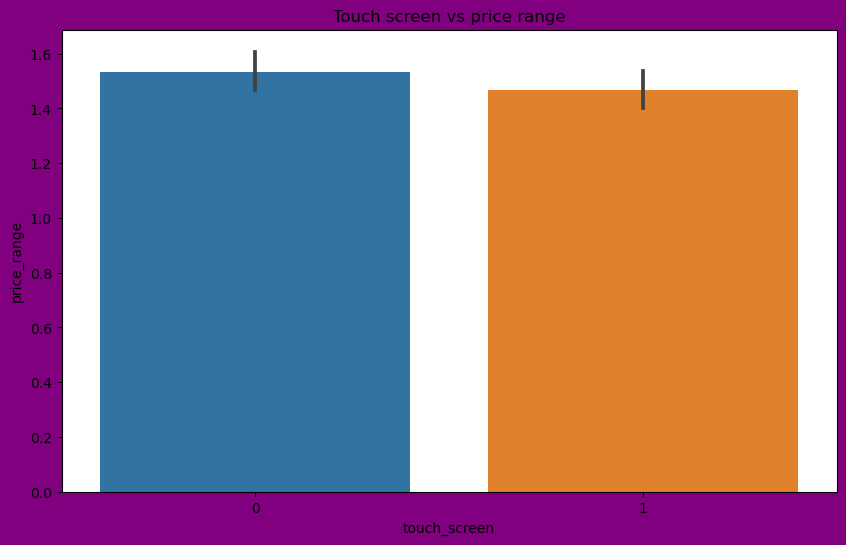

In [67]:
plt.figure(figsize=(10,6),facecolor="purple") 
sns.barplot(df,x="touch_screen", y ="price_range")
plt.title("Touch screen vs price range")

###### touch_screen vs price_range Insight
 - The phone price is more which phone has no touch screen. 

### wifi vs price_range

Text(0.5, 1.0, 'wifi vs price range')

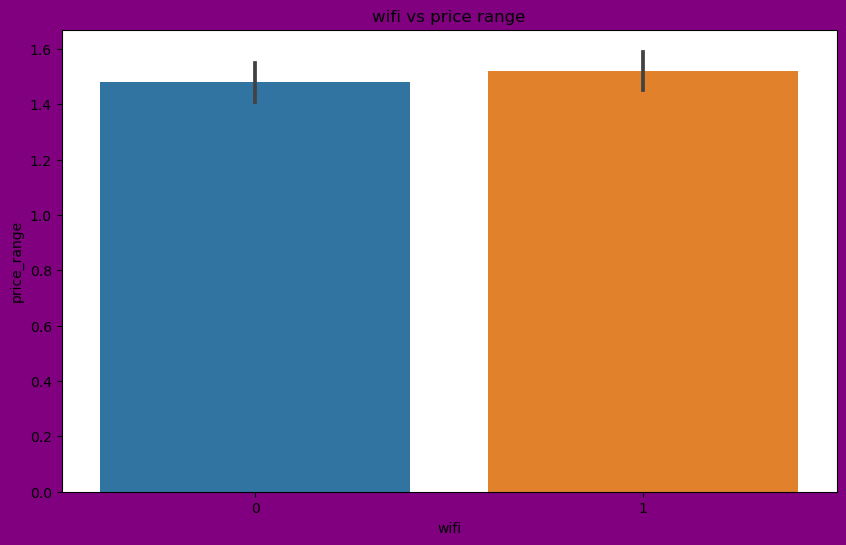

In [68]:
plt.figure(figsize=(10,6),facecolor="purple")
sns.barplot(df,x="wifi", y ="price_range")
plt.title("wifi vs price range")

###### wifi vs price_range insight
 -  Price range is same 

##### also by using pandas profiling we can visulize the data

In [69]:
# from pandas_profiling import ProfileReport
# report = ProfileReport(df)
# report.to_notebook_iframe()

# Data Preprocessing
   - A real-world data generally contains noises, missing values, and maybe in an unusable format which cannot be directly used for machine learning models. Data preprocessing is required tasks for cleaning the data and making it suitable for a machine learning model which also increases the accuracy and efficiency of a machine learning model.
   
---------------------------------------------------------------------
   - When creating a machine learning project, it is not always a case that we come across the clean and formatted data. And while doing any operation with data, it is mandatory to clean it and put in a formatted way. So for this, we use data preprocessing task.
   
----------------------------------------------------------------------
- we will do some process in Data preprocessing.
 - check corrupted value if there is present then i will replace by 0.
 - Check duplicate rows If there is a duplicate, we will drop it.
 - check missing value if there is missing value, we will imput missing value by using mean,median, mode or KNN imputation.
 - check outliers, if outlier detect in features then we will handle outlier by using IQR (Interquartile Range) Method.
 - if feature is in categorical form (yes or no) then i will convert in numerical form (0 and 1) etc.
 - we will check the data is normalize or not if not normalize then i use Min-Max Scaller for normalization.
 - 

In [70]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


-  Here two columns are corrupted.
-  px_height- The Pixel Resolution Height of the phone can't be zero but in this column showing 0 so this column is corrupted.
-  sc_w -  the screen width of phone can't be zero so this column of the dataset is is corrupted.

#### aww now we will replace corrupted value by 0

In [71]:
## using median for handle corrupted value.
df.px_height.replace(0, np.median(df.px_height),inplace=True)
df.sc_w.replace(0, np.median(df.sc_w),inplace=True)

In [72]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.672000,1251.515500,2124.213000,12.306500,6.217000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.318507,432.199447,1084.732044,4.213245,3.979174,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,1.000000,500.000000,256.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,284.000000,874.750000,1207.500000,9.000000,3.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


-------------------------------------------------------------

#### checking duplicate rows

In [73]:
duplic_ate= df[df.duplicated()]
duplic_ate

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


- here we see the data has no duplicate rows.
-----------------------------------------------

#### checking missing values

In [74]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

- data has no missing values.
--------------------------------------------------------

### checking outliers

 - we will check outliers on categorical data 

- first we will seprate categorical data and numerical data

In [75]:
# seprating numerical column and categorical column
cat_col= ['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range']
num_col= ['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']

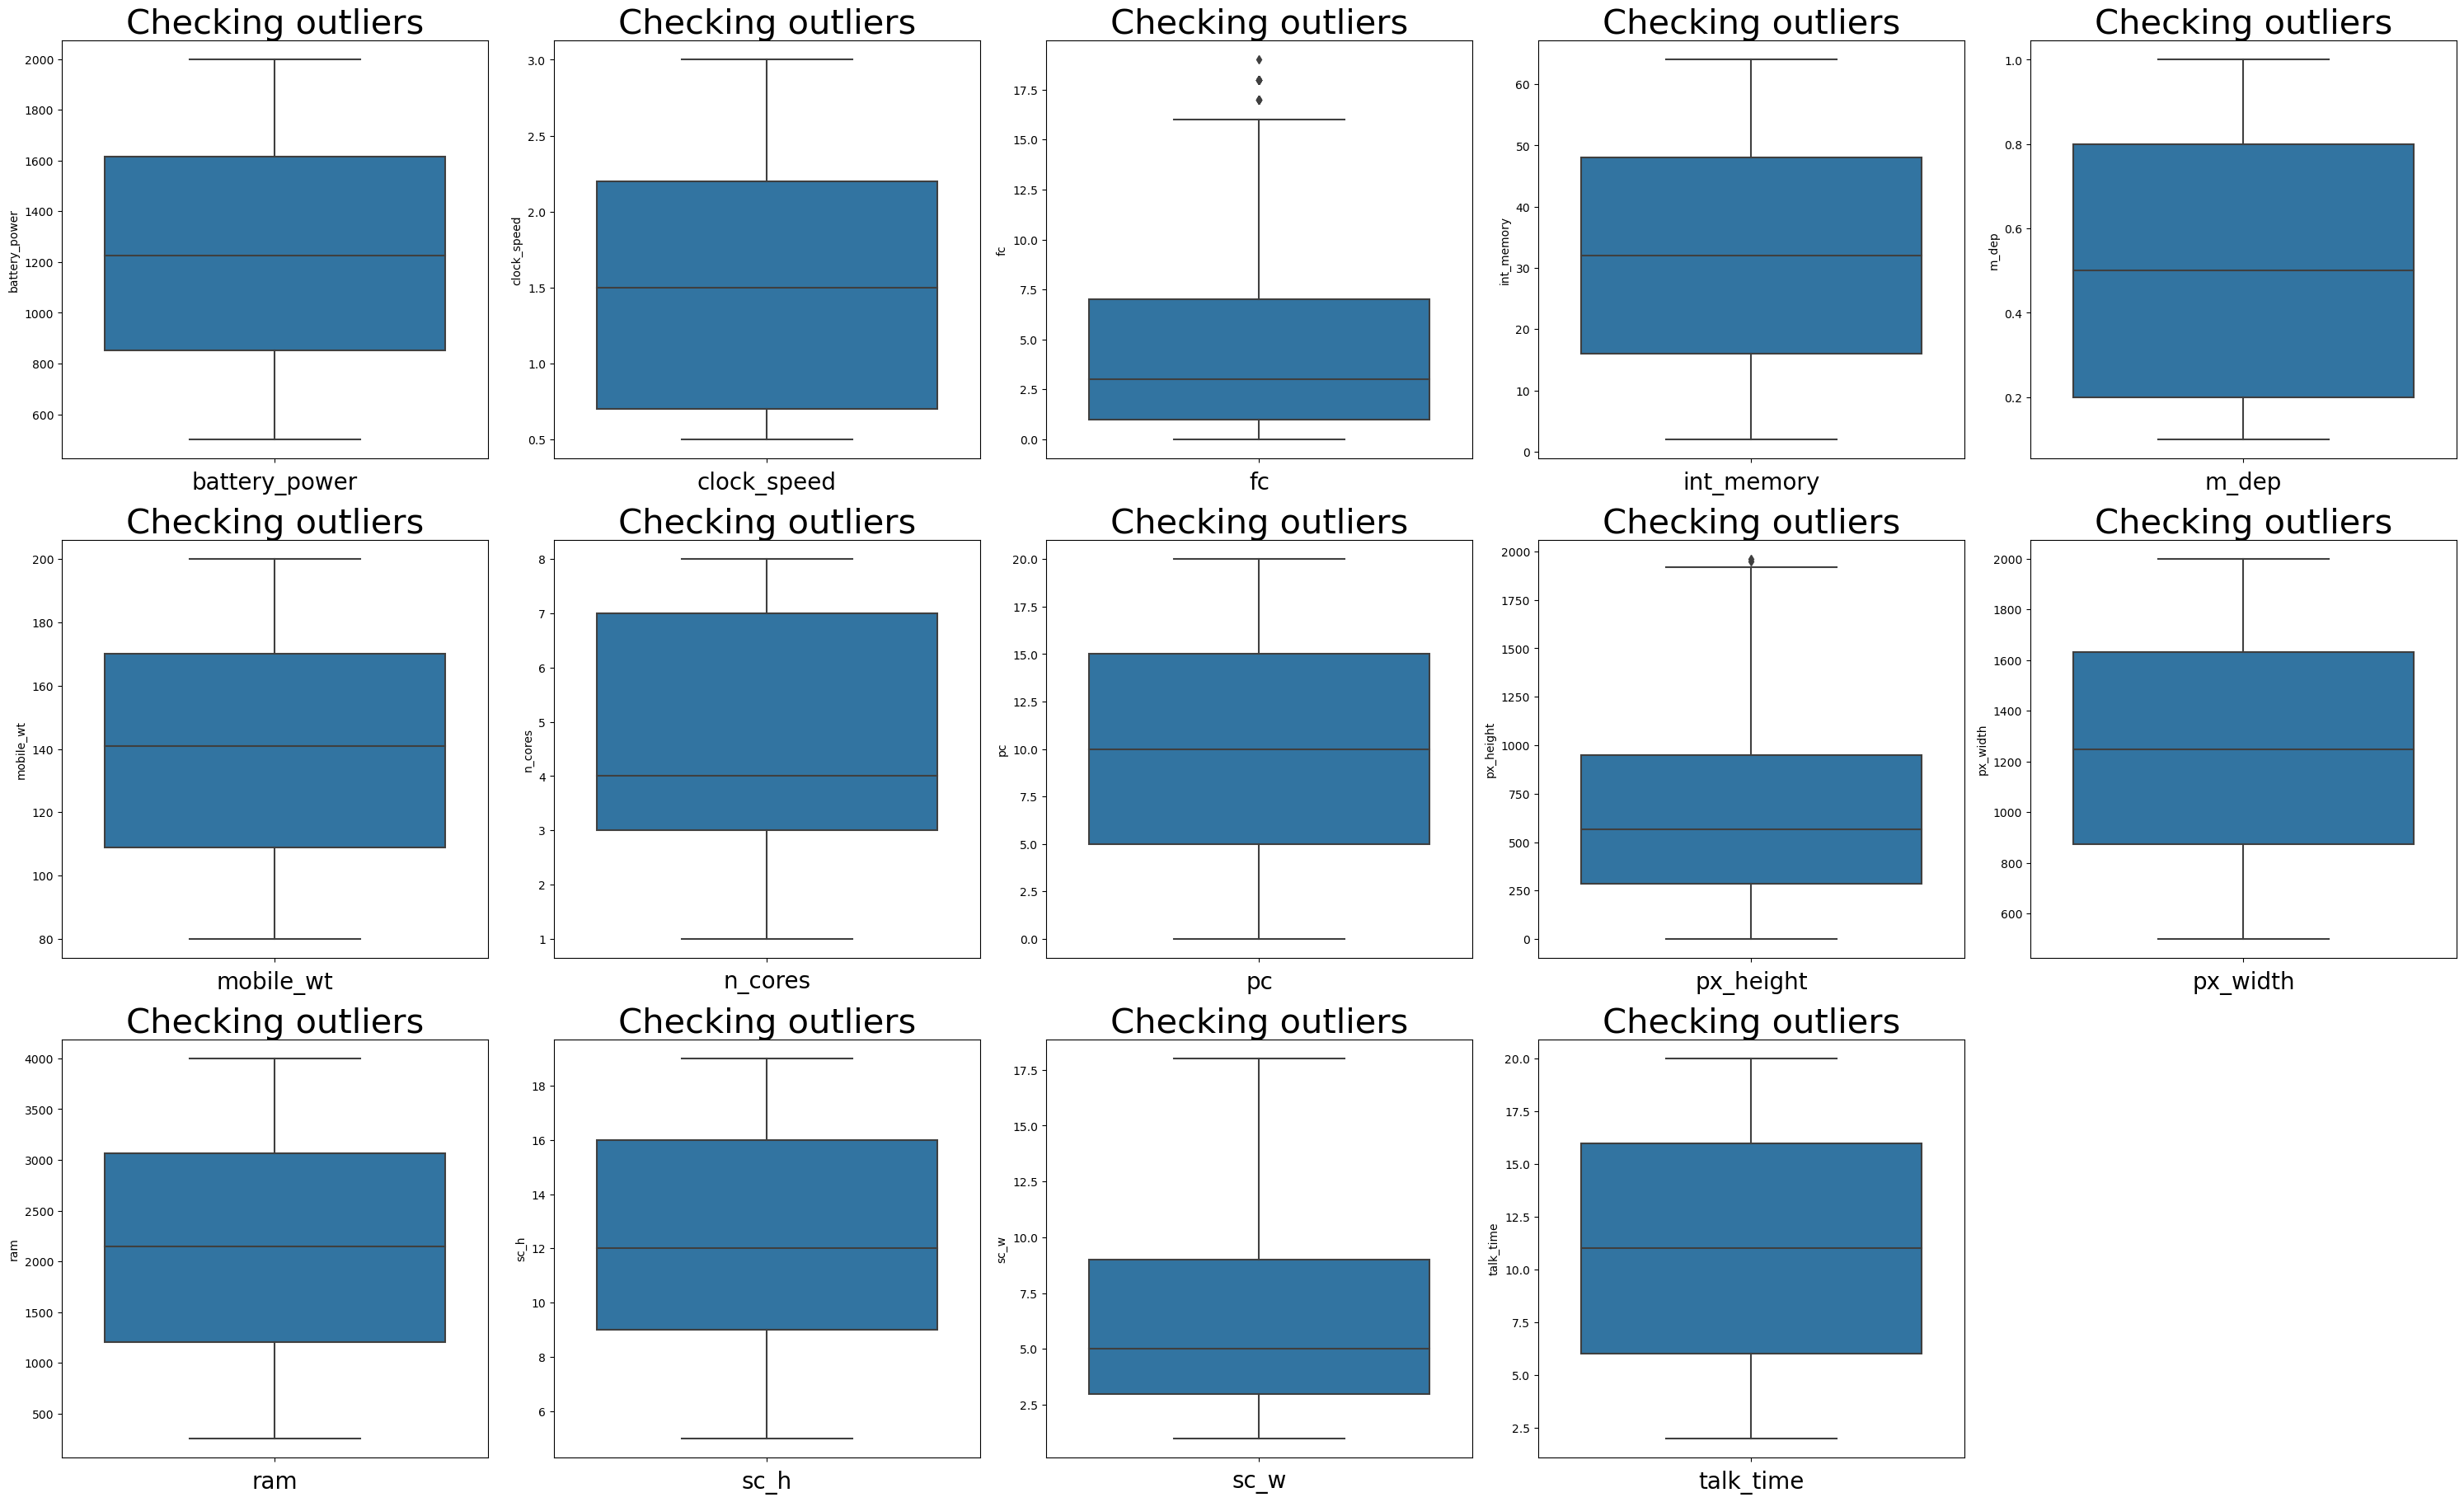

In [76]:
plt.figure(figsize=(30,30),facecolor="white")
plotnumber = 1
for column in num_col:
    if (plotnumber<25):
        a = plt.subplot(5,5,plotnumber)
        #sns.boxplot(df[column],orient='v')
        sns.boxplot(y = column, data=df)
        plt.xlabel(column,fontsize=20)
        plt.title("Checking outliers",fontsize=30)
    plotnumber+=1
plt.tight_layout()

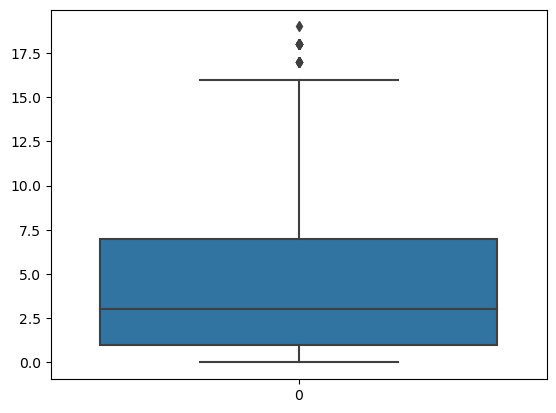

In [77]:
sns.boxplot(df.fc)
plt.show()

- Here looking outliers in front camera (fc)

### removing outliers
 - removing outliers by using IQR.

In [78]:
# importing library allows to access the statistical functions
from scipy import stats

In [79]:
IQR = stats.iqr(df.fc,interpolation="midpoint")
IQR

6.0

In [80]:
Q1 = df.fc.quantile(0.25) # defining 25% of data
Q3 = df.fc.quantile(0.75) # defining 75% of data
min_limit = Q1 - 1.5*IQR

max_limit = Q3 + 1.5*IQR

In [81]:
print(min_limit, max_limit)

-8.0 16.0


In [82]:
df.loc[df['fc']<min_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [83]:
df.loc[df['fc']>max_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
95,1137,1,1.0,0,18,0,7,1.0,196,3,19,942,1179,3616,13,5,12,1,1,1,3
169,1569,0,2.8,1,17,0,44,0.3,110,4,20,45,1942,1260,9,2,17,1,0,0,1
226,1708,1,2.4,1,18,1,49,0.1,109,1,19,233,517,3388,6,4,16,1,1,1,3
229,1689,0,1.8,0,17,0,24,0.3,127,3,18,954,1200,2766,7,2,7,0,1,1,3
300,1937,1,1.7,0,17,0,58,0.6,189,1,19,1728,1767,3321,5,4,14,1,1,0,3
305,1348,0,2.0,0,18,0,52,0.3,98,3,20,1869,1942,955,18,11,7,1,1,1,1
372,1703,1,1.5,1,17,1,55,0.7,138,5,19,1411,1711,2993,5,1,20,1,1,1,3
584,946,1,2.6,1,17,0,5,0.1,166,3,20,1698,1771,3720,15,7,4,0,1,0,3
1387,1533,1,1.1,1,18,1,17,0.3,160,4,20,1054,1393,2520,8,2,11,1,0,1,2
1406,1731,1,2.3,1,18,0,60,0.5,171,4,20,142,1039,1220,9,3,20,0,1,0,1


In [84]:
df.loc[df['fc']>max_limit,'fc']=np.median(df.fc)

In [85]:
df.loc[df['fc']>max_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


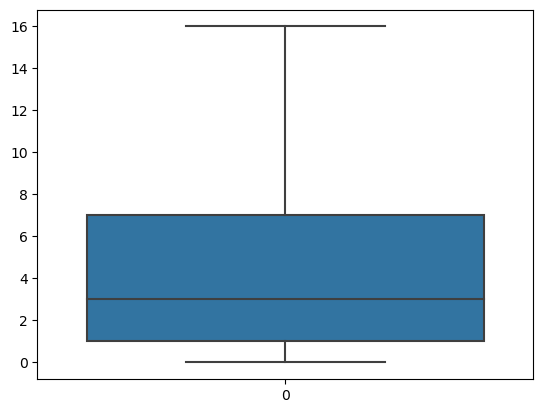

In [86]:
sns.boxplot(df.fc)
plt.show()

- removed outliers
--------------------------------------------------------------------------

####  Checking Normalization 
   - checking the data is normal or not(how the data is distributed)

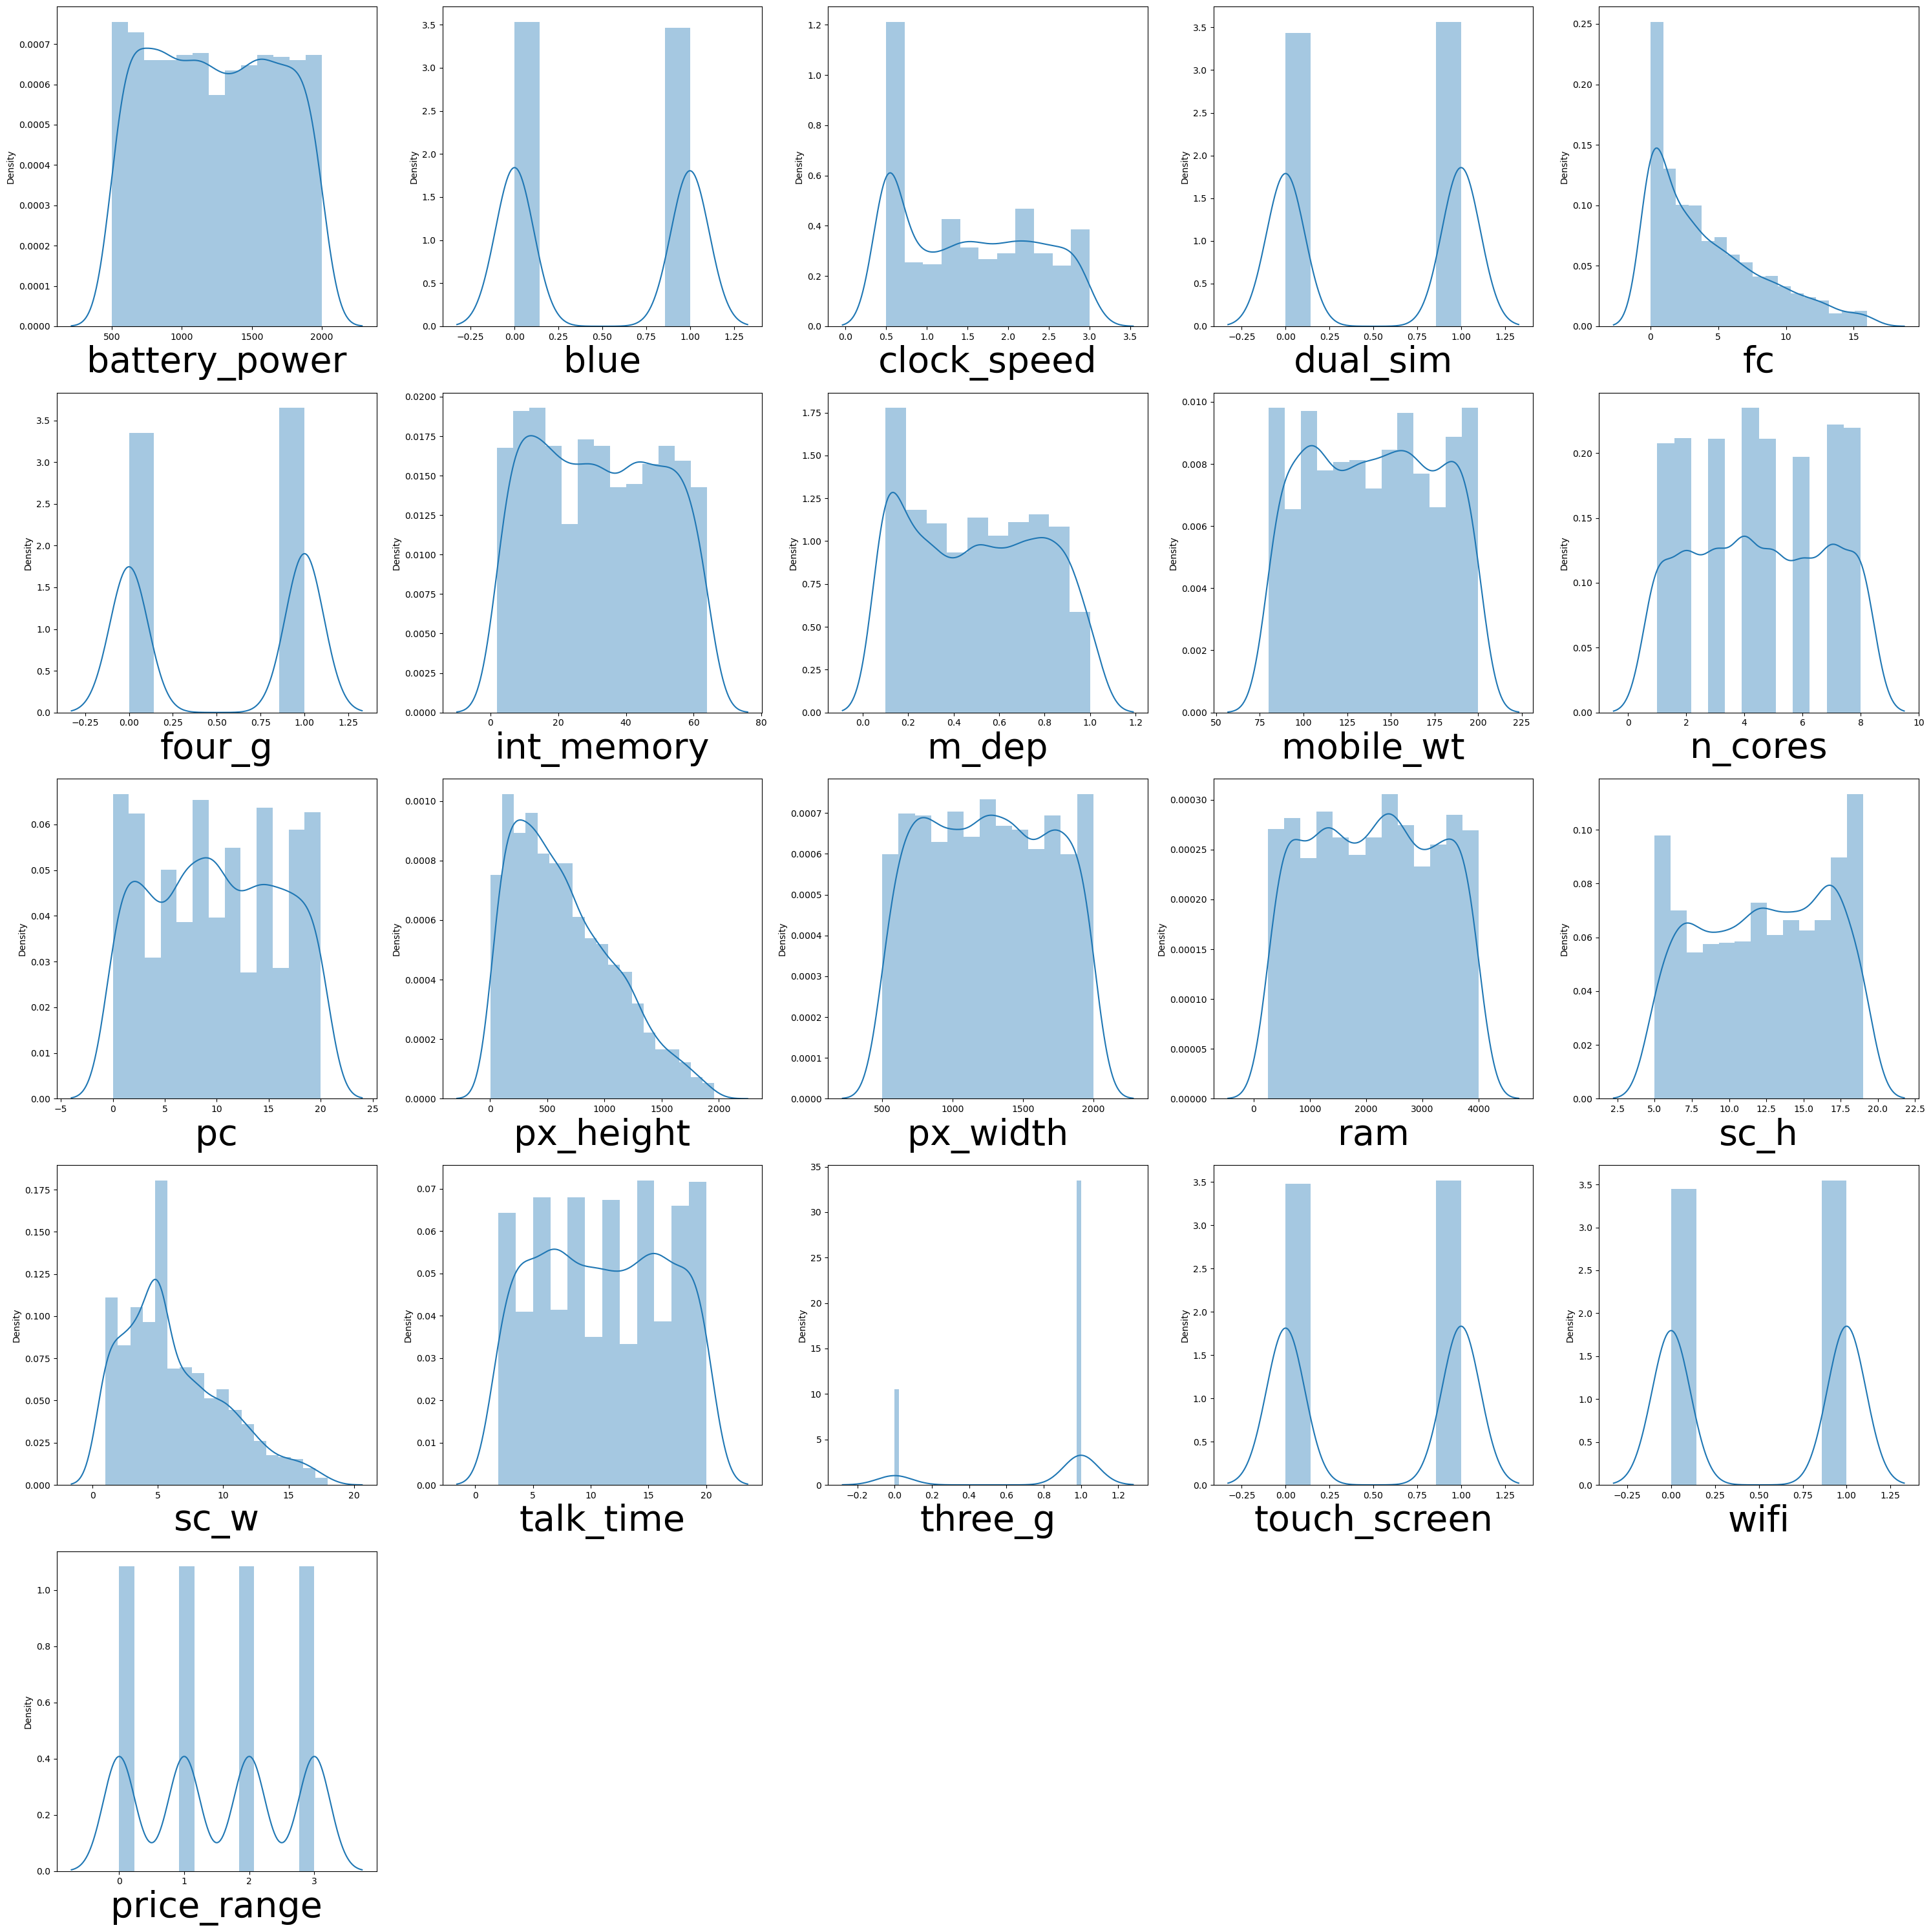

In [87]:
plt.figure(figsize=(30,30),facecolor="white")
plotnumber = 1
for column in df:
    if (plotnumber<25):
        a = plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=40)
    plotnumber+=1
plt.tight_layout()

 - some feature is not normalize like - fc and px_height but it will not make much imapct on all data set so i lave as well as.
 ---------------------------------------------------------------------

### scaling the data

In [88]:
## seprate independent and dependent variable
X = df.iloc[:,:-1] # this is all my input column
y = df.iloc[:,-1] # this is target valriable.

In [89]:
# import Standscaller for scalling data also we can use min-max scaler but i prefred standardscalet
from sklearn.preprocessing import StandardScaler

In [90]:
scaler=StandardScaler()
scaler

StandardScaler()

In [91]:
scaled_data = scaler.fit_transform(X)
scaled_data

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [92]:
x=pd.DataFrame(scaled_data, columns=X.columns) # arrange in tabular form
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.765716,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.411690,-1.146784,0.391703,-0.784983,0.196824,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-1.006735,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585116,1.704465,0.467317,1.114266,-0.808661,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.524698,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392864,1.074968,0.441498,-0.310171,-1.060033,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-1.006735,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286819,1.236971,0.594569,0.876859,0.448195,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.126507,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268769,-0.091452,-0.657666,-1.022389,-1.060033,0.730240,0.559641,0.994018,-1.014099


#### Check for the duplicated data

In [93]:
# checking the duplicate rows
df.duplicated().sum()

0

 - here no duplicate data present in the dataset

# Feature selection
 - checking if data is above 80-90% coorelated then we can drop it otherwise it will not more effect on our data set. 

<Axes: >

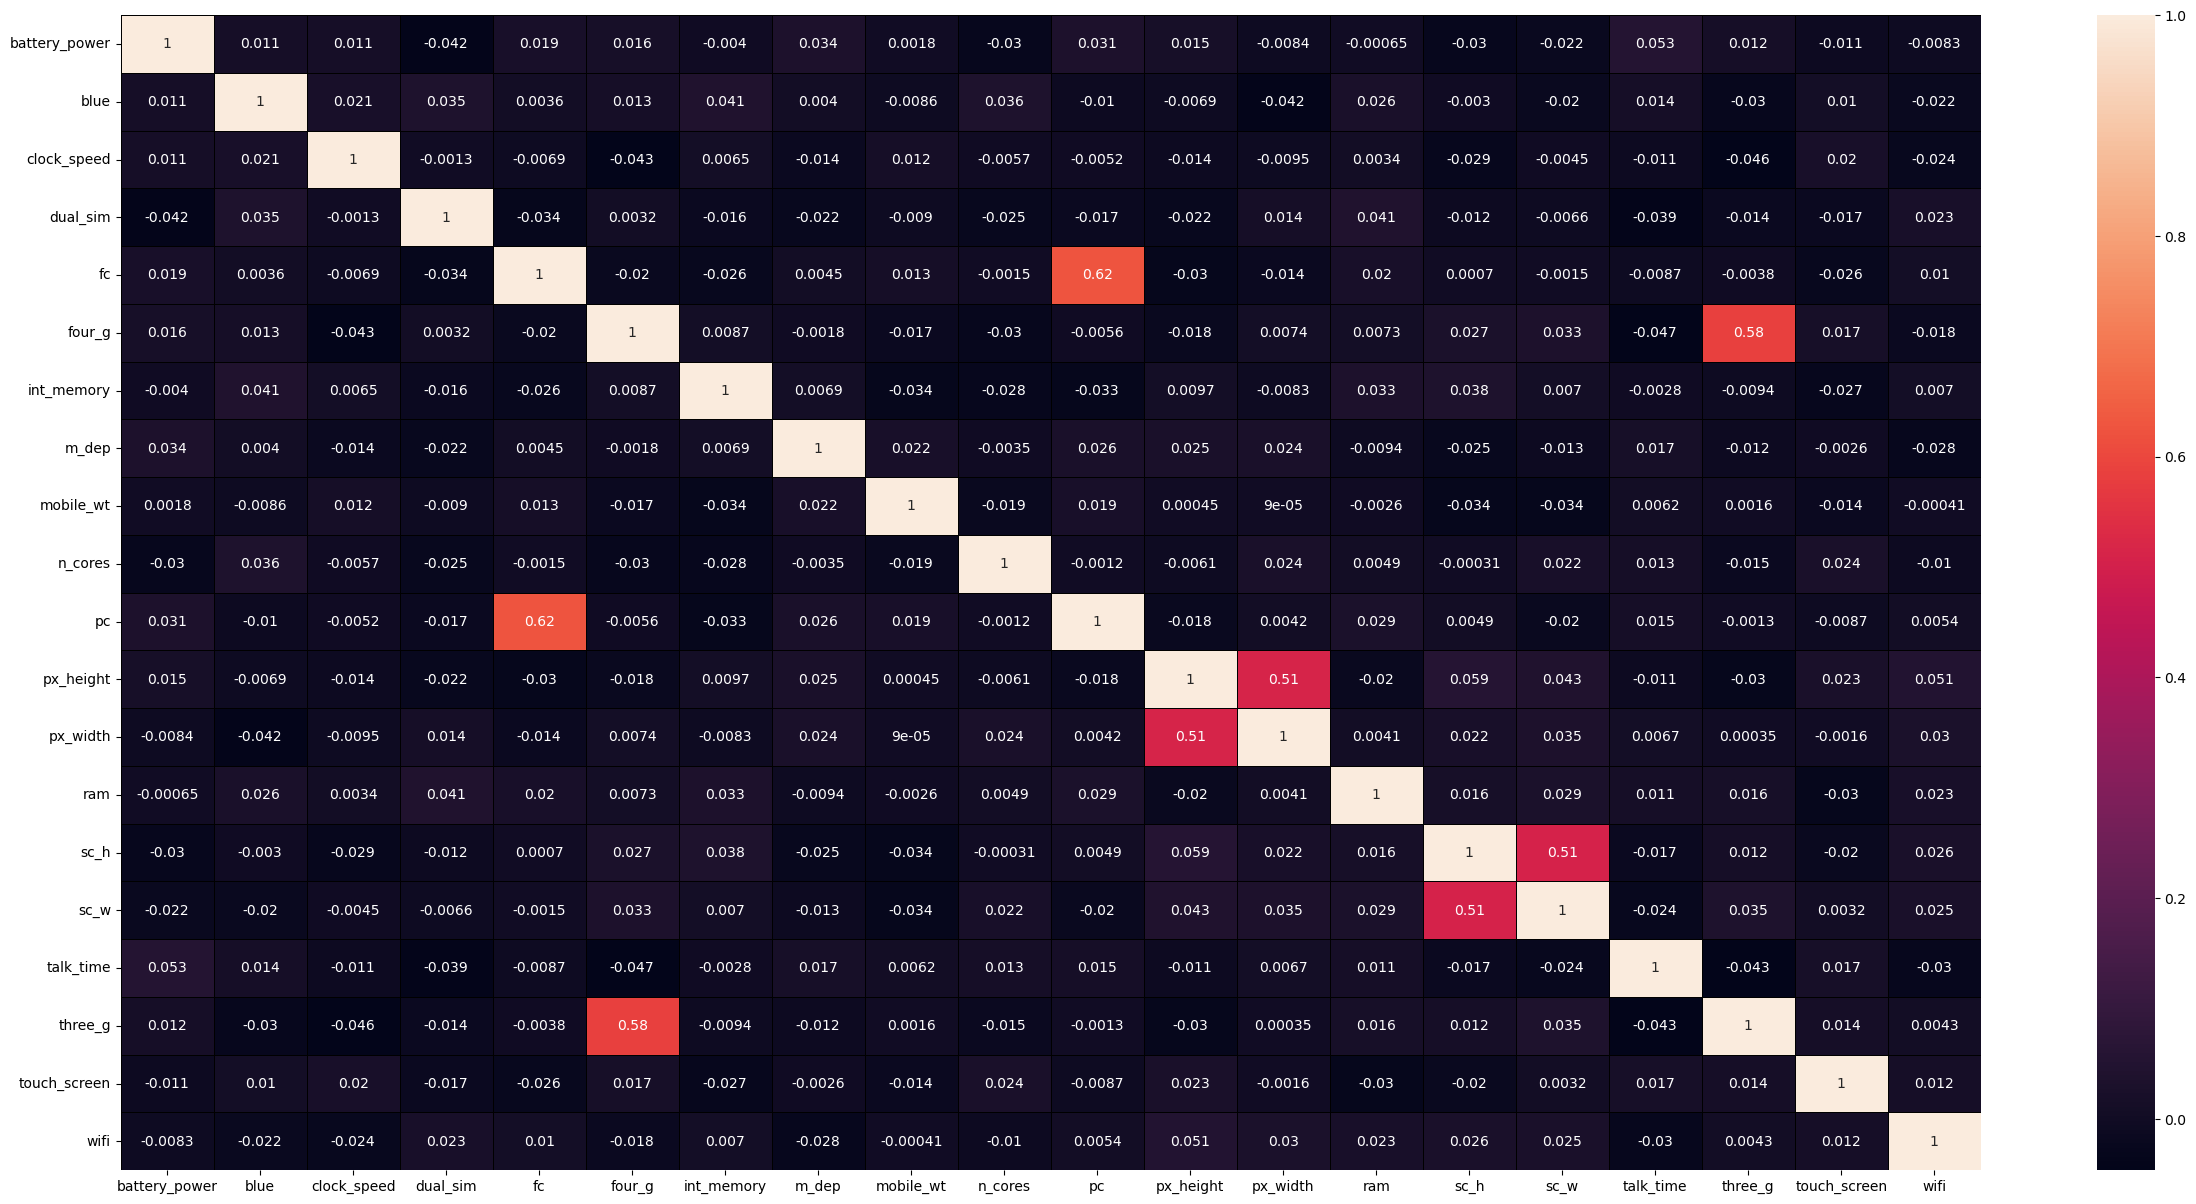

In [94]:
plt.figure(figsize=(30,15))
sns.heatmap(x.corr(),linewidths=0.5,linecolor='black',annot=True)

- No independent features have higher coorelation with each other which can eaisly be interpreted with heatmap coorelation plot.
- Three_g vs Four_g , pc vs fc and px_width vs px_height are moderate coorelated so we don't need to drop it.

## Train test split

In [95]:
### we already seprated data into independent and dependent feature during scalling the data

In [96]:
x.head(2) # Independent feature( input column in dataset)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.765716,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.411690,-1.146784,0.391703,-0.784983,0.196824,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-1.006735,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585116,1.704465,0.467317,1.114266,-0.808661,-0.734267,0.559641,0.994018,-1.014099


In [97]:
y.head(2) # dependent feature(targate variable)

0    1
1    2
Name: price_range, dtype: int64

In [98]:
# importing train test split for traning and testing the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [99]:
# Shape of the training and testing dataset
x_train.shape, y_train.shape, x_test.shape,y_test.shape

((1600, 20), (1600,), (400, 20), (400,))

------------------------------------------------------------------------

## Balancing the data

In [100]:
y.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

- data is alrady is balanced so we don't need to balance the data
------------------------------------------------------------------------

#### If data is not balance we can use SMOTE

In [101]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# x_smote,y_smote = smote.fit_resample(x_train,y_train)

#------------------------------------------


# from collections import Counter
# print("Actual Classe",Counter(y_train))
# print("SMOTE_Classe",Counter(y_smote))

# Model selection
 - Model selection is a crucial step when working on machine learning projects that can significantly impact the accuracy and efficiency of the projects.
 - since it is multiclass classofication problem so we will select diffrent algorithm to check the accuracy and  how this data is performing

### 1. LogisticRegression

 - since it is for binary classclassification but also can use in multiclass classification.

In [102]:
# Creating model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression() # object creation
clf.fit(x_train,y_train) # Train the model using the training data

LogisticRegression()

In [103]:
# Use the trained model to make predictions on the test data
y_pred = clf.predict(x_test)
y_pred

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 3, 2, 3, 3, 1, 0, 0, 2,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 2, 2, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 1, 3, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 3, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 3, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 3, 3, 1, 3, 1, 1, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

### Model Evualtion.

In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,precision_score,classification_report,f1_score,r2_score

In [105]:
cm = confusion_matrix(y_test,y_pred)

In [106]:
print(cm)

[[102   3   0   0]
 [  0  91   0   0]
 [  0   2  87   3]
 [  0   0   1 111]]


In [107]:
lr_accuracy = accuracy_score(y_test,y_pred)
lr_accuracy

0.9775

- Accuracy of this model is apporx 98%

In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.95      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



### 2.  RandomForestClassifier

In [109]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100,random_state=42).fit(x_train,y_train)
rf_clf

RandomForestClassifier(random_state=42)

In [110]:
rf_pred = rf_clf.predict(x_test)

In [111]:
rf_accuracy = accuracy_score(y_test,rf_pred)
rf_accuracy

0.88

In [112]:
cm_rf = confusion_matrix(y_test,rf_pred)

In [113]:
cm_rf

array([[100,   5,   0,   0],
       [  7,  74,  10,   0],
       [  0,   8,  77,   7],
       [  0,   0,  11, 101]], dtype=int64)

In [114]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.85      0.81      0.83        91
           2       0.79      0.84      0.81        92
           3       0.94      0.90      0.92       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



### 3. SVM  Classifier

In [115]:
from sklearn.svm import SVC
svc_clf = SVC().fit(x_train,y_train)
svc_clf


SVC()

In [116]:
svc_pred = svc_clf.predict(x_test)

In [117]:
svc_accuracy = accuracy_score(y_test,svc_pred)
svc_accuracy

0.89

In [118]:
cm_svc = confusion_matrix(y_test,svc_pred)
cm_svc

array([[ 99,   6,   0,   0],
       [  6,  80,   5,   0],
       [  0,  13,  75,   4],
       [  0,   0,  10, 102]], dtype=int64)

In [119]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       105
           1       0.81      0.88      0.84        91
           2       0.83      0.82      0.82        92
           3       0.96      0.91      0.94       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



### 4. Decision tree classifier

In [120]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier().fit(x_train,y_train)
dt_clf

DecisionTreeClassifier()

In [121]:
dt_pred = dt_clf.predict(x_test)

In [122]:
cm_dt = confusion_matrix(y_test,dt_pred)
cm_dt

array([[ 89,  16,   0,   0],
       [  6,  77,   8,   0],
       [  0,  13,  66,  13],
       [  0,   0,  10, 102]], dtype=int64)

In [123]:
dt_accuracy = accuracy_score(y_test,dt_pred)
dt_accuracy

0.835

In [124]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       105
           1       0.73      0.85      0.78        91
           2       0.79      0.72      0.75        92
           3       0.89      0.91      0.90       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.83      0.84       400



### 5. AdaBoostClassifier

In [125]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier().fit(x_train,y_train)
ada_clf

AdaBoostClassifier()

In [126]:
ada_pred= ada_clf.predict(x_test)

In [127]:
ada_cm= confusion_matrix(y_test,ada_pred)
ada_cm

array([[81, 24,  0,  0],
       [ 7, 74, 10,  0],
       [ 0,  5, 81,  6],
       [ 0,  0, 24, 88]], dtype=int64)

In [128]:
ada_accuracy = accuracy_score(y_test,ada_pred)
ada_accuracy

0.81

In [129]:
print(classification_report(y_test,ada_pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84       105
           1       0.72      0.81      0.76        91
           2       0.70      0.88      0.78        92
           3       0.94      0.79      0.85       112

    accuracy                           0.81       400
   macro avg       0.82      0.81      0.81       400
weighted avg       0.83      0.81      0.81       400



### 6. GradientBoostingClassifier

In [130]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier().fit(x_train,y_train)
gbc_clf

GradientBoostingClassifier()

In [131]:
gbc_pred= gbc_clf.predict(x_test)

In [132]:
gbc_cm= confusion_matrix(y_test,gbc_pred)
gbc_cm

array([[100,   5,   0,   0],
       [  4,  81,   6,   0],
       [  0,   9,  76,   7],
       [  0,   0,  10, 102]], dtype=int64)

In [133]:
gbc_accuracy=accuracy_score(y_test,gbc_pred)
gbc_accuracy

0.8975

In [134]:
print(classification_report(y_test,gbc_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.85      0.89      0.87        91
           2       0.83      0.83      0.83        92
           3       0.94      0.91      0.92       112

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



### 7. XGBClassifier

In [135]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier().fit(x_train,y_train)
xgb_clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [136]:
xgb_pred=xgb_clf.predict(x_test)

In [137]:
xgb_accuracy= accuracy_score(y_test,xgb_pred)
xgb_accuracy

0.9025

In [138]:
xgb_cm = confusion_matrix(y_test,xgb_pred)
xgb_cm

array([[ 99,   6,   0,   0],
       [  5,  84,   2,   0],
       [  0,   7,  78,   7],
       [  0,   0,  12, 100]], dtype=int64)

In [139]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       105
           1       0.87      0.92      0.89        91
           2       0.85      0.85      0.85        92
           3       0.93      0.89      0.91       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



### 8. Naive Bayes

In [140]:
from sklearn.naive_bayes import BernoulliNB
nb_clf = BernoulliNB().fit(x_train,y_train)
nb_clf

BernoulliNB()

In [141]:
nb_pred=nb_clf.predict(x_test)

In [142]:
nb_cm = confusion_matrix(y_test,nb_pred)
nb_cm

array([[70, 35,  0,  0],
       [36, 35, 16,  4],
       [ 1,  9, 55, 27],
       [ 0,  0, 36, 76]], dtype=int64)

In [143]:
nb_accuracy = accuracy_score(y_test,nb_pred)
nb_accuracy

0.59

In [144]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       105
           1       0.44      0.38      0.41        91
           2       0.51      0.60      0.55        92
           3       0.71      0.68      0.69       112

    accuracy                           0.59       400
   macro avg       0.58      0.58      0.58       400
weighted avg       0.59      0.59      0.59       400



### 9. KNeighborsClassifier

In [145]:
from sklearn.neighbors import KNeighborsClassifier
KN_clf = KNeighborsClassifier().fit(x_train,y_train)
KN_clf

KNeighborsClassifier()

In [146]:
KN_pred= KN_clf.predict(x_test)

In [147]:
KN_cm = confusion_matrix(y_test,KN_pred)
KN_cm

array([[70, 32,  3,  0],
       [25, 40, 22,  4],
       [ 6, 38, 37, 11],
       [ 2, 11, 41, 58]], dtype=int64)

In [148]:
KN_accuracy = accuracy_score(y_test,KN_pred)
KN_accuracy

0.5125

In [149]:
print(classification_report(y_test,KN_pred))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67       105
           1       0.33      0.44      0.38        91
           2       0.36      0.40      0.38        92
           3       0.79      0.52      0.63       112

    accuracy                           0.51       400
   macro avg       0.54      0.51      0.51       400
weighted avg       0.56      0.51      0.53       400



# Show accuracy of all Algorithm that i use in above.

In [150]:
acc1 = ['lr_accuracy','rf_accuracy','svc_accuracy','dt_accuracy','ada_accuracy','gbc_accuracy','xgb_accuracy','nb_accuracy','KN_accuracy'] 

In [151]:
acc2 = [lr_accuracy,rf_accuracy,svc_accuracy,dt_accuracy,ada_accuracy,gbc_accuracy,xgb_accuracy,nb_accuracy,KN_accuracy]

In [152]:
for i in range(len(acc1)):
    print(acc1[i],   " - "   ,acc2[i])

lr_accuracy  -  0.9775
rf_accuracy  -  0.88
svc_accuracy  -  0.89
dt_accuracy  -  0.835
ada_accuracy  -  0.81
gbc_accuracy  -  0.8975
xgb_accuracy  -  0.9025
nb_accuracy  -  0.59
KN_accuracy  -  0.5125


# Hyperparameter tuning

 -  By using Hyperparameter it will Prevent Overfitting, underfitting and Optimize Performance

#### Hyperparameter in xgboost

In [153]:
import xgboost

In [154]:
# performing hyperparameter tuning use RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [155]:
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

# Initialize an XGBoost classifier with specific settings
XGB_clf1=XGBClassifier(random_state=42,verbosity=0,silent=0)

# Initialize RandomizedSearchCV for hyperparameter tuning
xgb_rcv=RandomizedSearchCV(estimator=XGB_clf1,scoring='f1',param_distributions=param_grid,n_iter=100,cv=5,verbose=2,random_state=42,n_jobs=-1)
# estimator=XGB,                  -Base model
# scoring='f1',                   -Scoring metric for evaluation
# param_distributions=param_grid, -Hyperparameter grid for search
# n_iter=100,                     -Number of random combinations to try
# cv=5,                           -Number of cross-validation folds
# verbose=2,                      -Verbosity level for output
# random_state=42,                -Random seed for reproducibility
# n_jobs=-1                       -Number of CPU cores to use for parallel processing


In [156]:
xgb_rcv.fit(x_train,y_train) # Fit the RandomizedSearchCV object to the training data

xgb_cv_best_params=xgb_rcv.best_params_ # Get the best hyperparameters from the search
print(f"Best parameters: {xgb_cv_best_params}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'reg_lambda': 1.6, 'reg_alpha': 12.8, 'n_estimators': 50, 'max_depth': 8, 'learning_rate': 0.7, 'gamma': 0}


In [157]:
XGB_clf2=XGBClassifier(reg_lambda= 1.6, reg_alpha= 12.8, n_estimators=50, max_depth=8, learning_rate=0.7, gamma=0)
XGB_clf2.fit(x_train, y_train)
y_predict=XGB_clf2.predict(x_test) # make predictions on the test data using trained model
f1_score=f1_score(y_predict,y_test,average='weighted')

In [158]:
f1_score

0.8670856490687144

In [159]:
xgb2_accuracy=accuracy_score(y_test,y_predict)
xgb2_accuracy

0.8675

### RandomForest Hyperparameter tuning.

In [160]:
param_grid1= {
    
    'n_estimators'     : [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    'max_features'     : ['auto', 'sqrt'],
    'max_depth'        : [int(x) for x in np.linspace(10, 110, num=11)],
    'min_samples_split': [2,3,5,10,12,15],
    'min_samples_leaf' : [1,2,3,4,6,7],
    'bootstrap'        : [True, False],
}
# random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
#                'max_depth': max_depth, 'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=param_grid1, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

In [161]:
rf_cv.fit(x_train,y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params}" )

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': True}


In [162]:
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,precision_score,classification_report,f1_score,r2_score

In [163]:
rf_clf2 = RandomForestClassifier(n_estimators=200,min_samples_split=3, min_samples_leaf= 2,max_features='auto', max_depth=110,bootstrap=True)#passing best parameter to randomforest
rf_clf2.fit(x_train, y_train)#training 
y_predict1=rf_clf2.predict(x_test)#testing
f1_score_result= f1_score(y_test, y_predict1, average='weighted') #checking performance
f1_score_result

0.8954284830346596

In [164]:
rf2_accuracy=accuracy_score(y_test,y_predict1)
rf2_accuracy

0.895

### Hyperparameter tuning in DecisionTreeClassifier 

In [165]:
from sklearn.model_selection import RandomizedSearchCV

In [166]:
# creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params_dtree1 = {
    "criterion"        :("gini", "entropy"),  #quality of split
    "splitter"         :("best", "random"),   # searches the features for a split
    "max_depth"        :(list(range(1, 50))), #depth of tree range 1 to 19
    "min_samples_split":[2, 3, 4],            #the minimum number of samples required to split internal node
    "min_samples_leaf" :list(range(1, 20)),   #minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
    
}


dtree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 42
dtree_cv = RandomizedSearchCV(estimator=dtree_clf,param_distributions=params_dtree1, scoring="f1_micro",n_iter=100, n_jobs=-1, verbose=2, cv=5,random_state=42)



dtree_cv.fit(x_train,y_train)                 #training data on gridsearch cv
tree_best_params = dtree_cv.best_params_      #it will give you best parameters 
print(f"Best paramters: {tree_best_params})") #printing  best parameters



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best paramters: {'splitter': 'best', 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_depth': 46, 'criterion': 'entropy'})


In [167]:
tree_best_params

{'splitter': 'best',
 'min_samples_split': 3,
 'min_samples_leaf': 6,
 'max_depth': 46,
 'criterion': 'entropy'}

In [168]:
dt_clf2=DecisionTreeClassifier(
    splitter           = 'best',
    min_samples_split  = 3,
    min_samples_leaf   = 6,
    max_depth          = 46,
    criterion          = 'entropy'
)

In [169]:
dt_clf2

DecisionTreeClassifier(criterion='entropy', max_depth=46, min_samples_leaf=6,
                       min_samples_split=3)

In [170]:
dt_clf2.fit(x_train,y_train)
dt_predict1=dt_clf2.predict(x_test)
f1_score_dt= f1_score(y_test,dt_predict1,average='weighted')
f1_score_dt

0.8590066838305325

In [171]:
dt2_accuracy = accuracy_score(y_test,dt_predict1)

In [172]:
dt2_accuracy

0.8575

### Hyperparameter in Adaboost classifier

In [173]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.765716,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.411690,-1.146784,0.391703,-0.784983,0.196824,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-1.006735,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585116,1.704465,0.467317,1.114266,-0.808661,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.524698,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392864,1.074968,0.441498,-0.310171,-1.060033,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-1.006735,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286819,1.236971,0.594569,0.876859,0.448195,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.126507,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268769,-0.091452,-0.657666,-1.022389,-1.060033,0.730240,0.559641,0.994018,-1.014099


In [174]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [175]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np 


In [176]:
# Define the hyperparameter grid with a range of values for tuning
ada_param_grid = {
    'n_estimators': [50, 100, 150, 200],       # Number of base estimators
    'learning_rate': [0.01, 0.1, 0.2, 0.3],    # Learning rate for weight adjustment
    'base_estimator__max_depth': [1, 2, 3],    # Maximum depth of base decision tree
}

# Initialize a base estimator with a max_depth
base_est = DecisionTreeClassifier(max_depth=1)  # Example base estimator
ada_clf2 = AdaBoostClassifier(base_estimator=base_est, random_state=42)

In [177]:
# Initialize RandomizedSearchCV for hyperparameter tuning
ada_random_search = RandomizedSearchCV(
    estimator            =ada_clf2,      # Base model
    param_distributions  =ada_param_grid,# Hyperparameter grid for search
    scoring              ='accuracy',    # Scoring metric for evaluation
    n_iter               =100,           # Number of random combinations to try
    cv                   =10,             # Number of cross-validation folds
    verbose              =2,             # Verbosity level for output
    random_state         =42,            # Random seed for reproducibility
    n_jobs               =-1             # Number of CPU cores to use for parallel processing
)


In [178]:
# Fit the RandomizedSearchCV object of training data
ada_random_search.fit(x_train, y_train)

# Get the best hyperparameters
ada_best_param = ada_random_search.best_params_
print("Best Hyperparameters:", ada_best_param)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best Hyperparameters: {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator__max_depth': 3}


In [179]:
# Create an AdaBoost classifier with the best hyperparameters
ada_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=ada_best_param['base_estimator__max_depth']),
                                         n_estimators=ada_best_param['n_estimators'],
                                         learning_rate=ada_best_param['learning_rate'],
                                         random_state=42)


In [180]:
# Train the best classifier on the training data
ada_classifier.fit(x_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.01, random_state=42)

In [181]:
ada_predict= ada_classifier.predict(x_test)

In [182]:
accuracy_ada_clf = accuracy_score(y_test,ada_predict)
accuracy_ada_clf

0.78

In [183]:
# Evaluate the model on the test data (you can use accuracy, F1-score, or other metrics)
accuracy_ad = ada_classifier.score(x_test, y_test)
print("Accuracy on Test Data:", accuracy_ad)

Accuracy on Test Data: 0.78


#### LogisticRegression Hyperparameter Tuning

In [184]:
from sklearn.model_selection import RandomizedSearchCV

In [185]:
lr_param = {
    "penalty" : ['l2'], # L1 or L2 (Regularization penality)
    "C"       : list(np.logspace(-3, 3, 7)), # Inverse of regularization strength
    'solver'  : ['liblinear', 'lbfgs', 'saga', 'newton-cg'],
    'max_iter': [100, 200, 300]
}

In [186]:
lr_reg = LogisticRegression(random_state=42)


# multi_class = 'auto',
# solver='lbfgs',

In [187]:
lr_random_cv = RandomizedSearchCV(
                estimator  =lr_reg,
                param_distributions =lr_param,
                scoring    ='accuracy',
                n_iter     =100,
                cv         =10,
                verbose    =2,
                n_jobs     =-1,
                error_score='raise'
)

In [188]:
lr_random_cv.fit(x_train,y_train)


Fitting 10 folds for each of 84 candidates, totalling 840 fits


RandomizedSearchCV(cv=10, error_score='raise',
                   estimator=LogisticRegression(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1.0, 10.0,
                                              100.0, 1000.0],
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l2'],
                                        'solver': ['liblinear', 'lbfgs', 'saga',
                                                   'newton-cg']},
                   scoring='accuracy', verbose=2)

In [189]:
lr_hyper = lr_random_cv.best_params_
lr_hyper

{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 100, 'C': 1000.0}

In [190]:
best_lr = LogisticRegression(random_state=42,**lr_hyper)

In [191]:
best_lr.fit(x_train,y_train)

LogisticRegression(C=1000.0, random_state=42)

In [192]:
lr_accuracy1 = best_lr.score(x_test, y_test)
print("Accuracy on Test Data:", lr_accuracy1)

Accuracy on Test Data: 0.98


In [193]:
lr_predict_para= best_lr.predict(x_test)

In [194]:
accuracy_lr_clf = accuracy_score(y_test,lr_predict_para)
accuracy_lr_clf

0.98

### Accuracy Without Hyperparameter tuning

In [195]:
for i in range(len(acc1)):
    print(acc1[i],  " ------- "  ,acc2[i])

lr_accuracy  -------  0.9775
rf_accuracy  -------  0.88
svc_accuracy  -------  0.89
dt_accuracy  -------  0.835
ada_accuracy  -------  0.81
gbc_accuracy  -------  0.8975
xgb_accuracy  -------  0.9025
nb_accuracy  -------  0.59
KN_accuracy  -------  0.5125


### Accuracy after Hyperparameter tuning

In [196]:
hyper_accuracy = [xgb2_accuracy,rf2_accuracy,dt2_accuracy,accuracy_ada_clf,accuracy_lr_clf]

In [197]:
hyper_accuracy1 = ['xgb2_accuracy','rf2_accuracy','dt2_accuracy','accuracy_ada_clf','accuracy_lr_clf']

In [198]:
for i in range(len(hyper_accuracy1)):
    print(hyper_accuracy1[i],"  ------ " ,hyper_accuracy[i])

xgb2_accuracy   ------  0.8675
rf2_accuracy   ------  0.895
dt2_accuracy   ------  0.8575
accuracy_ada_clf   ------  0.78
accuracy_lr_clf   ------  0.98
